**Réalisé par:**    


*   Bilel MOSBAH.
*   Karim OUSSAID.
*   Katia OUNNADI.

# **Libraries**

In [ ]:
pip install -U dataprep

     |████████████████████████████████| 3.5 MB 4.4 MB/s 
     |████████████████████████████████| 943 kB 70.5 MB/s 
     |████████████████████████████████| 10.9 MB 43.6 MB/s 
     |████████████████████████████████| 158 kB 47.0 MB/s 
     |████████████████████████████████| 1.1 MB 46.6 MB/s 
     |████████████████████████████████| 848 kB 45.2 MB/s 
     |████████████████████████████████| 1.5 MB 45.7 MB/s 
     |████████████████████████████████| 719 kB 42.5 MB/s 
     |████████████████████████████████| 63 kB 1.4 MB/s 
     |████████████████████████████████| 366 kB 45.5 MB/s 
     |████████████████████████████████| 271 kB 45.4 MB/s 
     |████████████████████████████████| 94 kB 3.0 MB/s 
     |████████████████████████████████| 144 kB 49.8 MB/s 
     |████████████████████████████████| 133 kB 41.6 MB/s 
     |████████████████████████████████| 49 kB 5.4 MB/s 
     |████████████████████████████████| 1.5 MB 40.9 MB/s 
     |████████████████████████████████| 1.5 MB 48.9 MB/s 
     |██████████████

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
from dataprep.eda import create_report, plot
from sklearn.preprocessing import StandardScaler,MinMaxScaler

from sklearn.datasets import make_classification
from sklearn.decomposition import PCA 
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, Perceptron
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier, RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb

from sklearn.metrics.cluster import adjusted_rand_score
from sklearn.metrics.cluster import normalized_mutual_info_score

from sklearn.metrics import roc_curve, auc, precision_recall_curve, f1_score, roc_auc_score, plot_precision_recall_curve, accuracy_score,confusion_matrix

from sklearn.model_selection import cross_val_score
import warnings
from timeit import default_timer as timer

In [ ]:

from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib.patches as mpatches
import time


import collections


from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from collections import Counter
from sklearn.model_selection import KFold, StratifiedKFold
import warnings

## Fonctions

In [ ]:
import scipy.io as sio
import warnings
from sklearn.model_selection import GridSearchCV

warnings.filterwarnings("ignore")

**La liste des classifieurs**

In [ ]:
classifiers = {
    "LDA": LinearDiscriminantAnalysis(),
    "QDA": QuadraticDiscriminantAnalysis(),
    "KNN": KNeighborsClassifier(),
    "NB": GaussianNB(),
    "SVM": SVC(probability=True),
    "Logisitic Regression": LogisticRegression(),
    "Bagging": BaggingClassifier(),
    "CART": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Extra Trees": ExtraTreesClassifier(),
    "xgboost": xgb.XGBClassifier()
}

**Fonction de calcul des metrics**

In [ ]:
def calculate_metrics_train_test_split(classifiers, X_train, X_test, y_train, y_test):
  result={}
  time={}
  
  for key, classifier in classifiers.items():
    start = timer()    
    model = classifier.fit(X_train, y_train)
    end = timer()
    tmp = end-start

    predicted= model.predict(X_test)
    accuracy_= round(accuracy_score(y_test, predicted),3)
    result[key] = accuracy_
    time[key] = tmp
  
  return result, time

In [ ]:
def calculate_metrics_cross_val(classifiers, X, y):
  result={}
  time={}
  num_folds = 5

  for key, classifier in classifiers.items():
    kfold = KFold(n_splits=num_folds)
    start = timer()
    model = cross_val_score(classifier, X, y, cv=kfold, scoring="accuracy")
    end = timer()
    tmp = end-start
    result[key] = model.mean()
    time[key] = tmp
  
  return result, time

In [ ]:
def calculate_metrics_to_the_best_models(model, X_test, y_test):
    def plot_confusion_matrix(model,y_test, predicted):
      predicted=model.predict(X_test)
      cf_matrix = confusion_matrix(y_test, predicted)
    
      ax = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True,  fmt='.2%', cmap='Blues')
      ax.set_title('Seaborn Confusion Matrix with labels\n\n')
      ax.set_xlabel('\nPredicted Values')
      ax.set_ylabel('Actual Values ')
      ax.xaxis.set_ticklabels(['False','True'])
      ax.yaxis.set_ticklabels(['False','True'])
      plt.show()


    predicted= model.predict(X_test)
    accuracy_= round(accuracy_score(y_test, predicted),3)
    f1_score_= round(f1_score(y_test, predicted),3)
    precision_= round(precision_score(y_test, predicted),3)
    recall_= round(recall_score(y_test, predicted),3)
    nmi = round(normalized_mutual_info_score(y_test, predicted),3)
    ari = round(adjusted_rand_score(y_test, predicted),3)
    plot_confusion_matrix(model,y_test, predicted)
    print("Pour résumé le classifieur a donné les résultats suivant\n", 
          "\n   Accuracy", accuracy_,
          "\n   Precision", precision_,
          "\n   F1_score", f1_score_,
          "\n   Recall", recall_,
          "\n   NMI", nmi,
          "\n   ARI", ari)

In [ ]:
def calculate_metrics_to_the_best_models_multi_class(model, X_test, y_test):
    def plot_confusion_matrix(model,y_test, predicted):
      predicted=model.predict(X_test)
      cf_matrix = confusion_matrix(y_test, predicted)
    
      ax = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True,  fmt='.2%', cmap='Blues')
      ax.set_title('Seaborn Confusion Matrix with labels\n\n')
      ax.set_xlabel('\nPredicted Values')
      ax.set_ylabel('Actual Values ')
      ax.xaxis.set_ticklabels(['False','True'])
      ax.yaxis.set_ticklabels(['False','True'])
      plt.show()


    predicted= model.predict(X_test)
    accuracy_= round(accuracy_score(y_test, predicted),3)
    f1_score_= round(f1_score(y_test, predicted,average='macro'),3)
    precision_= round(precision_score(y_test, predicted,average='macro'),3)
    recall_= round(recall_score(y_test, predicted,average='macro'),3)
    nmi = round(normalized_mutual_info_score(y_test, predicted),3)
    ari = round(adjusted_rand_score(y_test, predicted),3)
    plot_confusion_matrix(model,y_test, predicted)
    print("Pour résumé le classifieur a donné les résultats suivant\n", 
          "\n   Accuracy", accuracy_,
          "\n   Precision", precision_,
          "\n   F1_score", f1_score_,
          "\n   Recall", recall_,
          "\n   NMI", nmi,
          "\n   ARI", ari)

**Fonction d'affichage de l'accuracy pour tous les modèles**

In [ ]:
def plot_models_results(scoring, time):

    toChart = pd.DataFrame(scoring.items(), columns =['ModelName','Accuracy'])
    toChart2 = pd.DataFrame(time.items(), columns =['ModelName','Time'])  

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,5))
    fig.suptitle('')

    ax1.bar(toChart.ModelName, toChart.Accuracy, color="maroon", width = 0.6)
    ax1.set_title("Accuracy des modèles.")
    ax1.set_xticklabels(toChart.ModelName, rotation=90)

    ax2.bar(toChart2.ModelName, toChart2.Time, color="maroon", width = 0.6)
    ax2.set_title("Temps d'execution des modèles.")
    ax2.set_xticklabels(toChart2.ModelName, rotation=90)

    plt.show()

**Grid Search**

In [ ]:
#LDA
lda_params={'solver':['svd', 'lsqr'] }

#QDA
qda_params={'reg_param': [0.1, 0.2, 0.3, 0.4, 0.5], }

#NB
nb_params={'var_smoothing': np.logspace(0,-9, num=100)}

#Logistic Regression 
log_reg_params = {"penalty": ['l1', 'l2'], 'C': [0.01, 0.1, 1, 100]}

#KNN
knn_params= {'n_neighbors': np.arange(2, 6), 'metric':['euclidean','manhattan'] }


#SVM
svm_params = {'C': [0.5, 0.7, 0.9, 1], 'kernel': ['rbf', 'poly', 'sigmoid', 'linear']}

#DecisionTree Classifier
tree_params = {"criterion": ["gini", "entropy"], "max_depth": list(range(2,4,1)), "min_samples_leaf": list(range(5,7,1))}

#BaggingClassifier    
bagging_params = {'max_samples' : [0.05, 0.1, 0.2, 0.5]}


#RandomForest Classifier
random_forest_params = { 'n_estimators': [2,5,10,15],'max_depth' : [4,5,6,7,8]}

#XGBoost
xgboost_params = {
        #'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 2, 5],
        #'subsample': [0.6, 0.8, 1.0],
        #'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]}

#Gradient Boosting
gradient_boosting_params = {
    #"loss":["deviance"],
    "learning_rate": [0.01, 0.05, 0.1, 0.2],
    #"min_samples_split": np.linspace(0.1, 0.5, 12),
    #"min_samples_leaf": np.linspace(0.1, 0.5, 12),
    "max_depth":[3,5,8],
    "max_features":["log2","sqrt"],
    "criterion": ["friedman_mse",  "mae"],
    #"subsample":[0.5, 0.618, 0.8, 0.85, 0.9, 0.95, 1.0],
    #"n_estimators":[10]
    }


#Extra Grid
extra_grid_params={ 
    #'n_estimators': range(50,126,25),
        'max_features': range(50,401,50)
        #'min_samples_leaf': range(20,50,5),
        #'min_samples_split': range(15,36,5)
        }


In [ ]:
def best_hyper(model,param_grid,X_train, y_train, X_test, y_test):
    kfold =KFold(n_splits=10)
    grid = GridSearchCV(model, param_grid, cv=kfold)
    grid.fit(X_train,y_train)
    m=grid.best_params_
    modelss = grid.best_estimator_
    scor = modelss.score(X_test,y_test)
    clr = classification_report(y_test,modelss.predict(X_test))
    return m, scor, clr, modelss

def grid_search_application(models,X_train, y_train, X_test, y_test):
  compare = []
  comp=[]
  confl=[]
  for name, model in models.items():
    x, y, conf, mod = best_hyper(model[0], model[1],X_train, y_train, X_test, y_test)   
    compare.append((name,x,y))
    comp.append(y)
    confl.append(conf)
  return compare, comp, confl


In [ ]:
def plot_roc(classifier, X_test, y_test, X_train, y_train):
  plt.figure(figsize=(18,10))
  plt.title('ROC Curve', fontsize=18)
  model = classifier.fit(X_train, y_train)
  proba= model.predict_proba(X_test)[:, 1]
  fpr, tpr, thresholds = roc_curve(y_test, proba)
  auc = round(roc_auc_score(y_test, proba), 3) 
  plt.plot(fpr, tpr, label=str(auc))
  plt.plot([0, 1], [0, 1], 'k--')
  plt.axis([-0.01, 1, 0, 1])
  plt.xlabel('False Positive Rate', fontsize=16)
  plt.ylabel('True Positive Rate', fontsize=16)
  plt.annotate('Minimum ROC Score of 50% \n (This is the minimum score to get)', xy=(0.5, 0.5), xytext=(0.6, 0.3), arrowprops=dict(facecolor='#6E726D', shrink=0.05))
  plt.legend()
  plt.show()

In [ ]:
def get_X(tab):
  return pd.concat((pd.DataFrame(data=tab['fea']), pd.DataFrame(columns=["class"],data=tab['gnd'])),axis = 1)

# **Part 1**

## Load data

In [ ]:
columns = ["Statut_compte", 
           "Duree", 
           "Historique_credit", 
           "Objectif", 
           "Montant_credit", 
           "Compte_epargne", 
           "Emploi_actuel", 
           "Taux-versements", 
           "Statut_personnel_sexe", 
           "Autres_debiteurs",
           "Residence_actuelle", 
           "Proprite", 
           "Age", 
           "Autres_plans_versement", 
           "Logement", 
           "Nombre_credits_existants", 
           "Travail", 
           "Nombre_pers_charge", 
           "Tel", 
           "Travailleur_etranger", 
           "Y"]

In [ ]:
data = pd.read_csv("/content/german.csv", header=None, names=columns)

In [ ]:
data.head()

,Statut_compte,Duree,Historique_credit,Objectif,Montant_credit,Compte_epargne,Emploi_actuel,Taux-versements,Statut_personnel_sexe,Autres_debiteurs,Residence_actuelle,Proprite,Age,Autres_plans_versement,Logement,Nombre_credits_existants,Travail,Nombre_pers_charge,Tel,Travailleur_etranger,Y
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,4,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,2,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,3,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,4,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,4,A124,53,A143,A153,2,A173,2,A191,A201,2


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Statut_compte             1000 non-null   object
 1   Duree                     1000 non-null   int64 
 2   Historique_credit         1000 non-null   object
 3   Objectif                  1000 non-null   object
 4   Montant_credit            1000 non-null   int64 
 5   Compte_epargne            1000 non-null   object
 6   Emploi_actuel             1000 non-null   object
 7   Taux-versements           1000 non-null   int64 
 8   Statut_personnel_sexe     1000 non-null   object
 9   Autres_debiteurs          1000 non-null   object
 10  Residence_actuelle        1000 non-null   int64 
 11  Proprite                  1000 non-null   object
 12  Age                       1000 non-null   int64 
 13  Autres_plans_versement    1000 non-null   object
 14  Logement                 

In [ ]:
data_quant=["Duree", 
           "Montant_credit", 
           "Taux-versements", 
           "Age", 
           "Nombre_credits_existants",
           "Residence_actuelle",         
           "Nombre_pers_charge"]

data_qual=["Statut_compte", 
           "Historique_credit", 
           "Compte_epargne",  
           "Objectif", 
           "Emploi_actuel", 
           "Statut_personnel_sexe", 
           "Autres_debiteurs",
           "Proprite",            
           "Autres_plans_versement", 
           "Logement",
           "Travail", 
           "Tel", 
           "Travailleur_etranger"]

data, y = data.drop('Y', axis='columns'), data["Y"]

## I. Analyse Exploratoire des données 

Commençons par analyser la distrubution des classes.

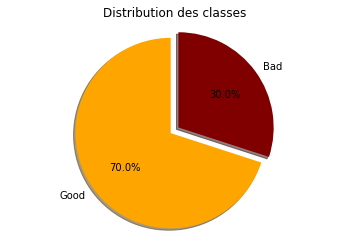

In [ ]:
labels = ['Good', 'Bad']
sizes = list(y.value_counts(normalize=True) * 100)
explode = (0, 0.1)
colors= ['orange', 'maroon']

fig1, ax1 = plt.subplots()
ax1.pie(sizes, colors=colors, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal') 
plt.title('Distribution des classes')
plt.show()

Nous remarquons que notre dataset est déséquilibré. Nous verrons par la suite comment le traiter.

Il est également important de savoir si notre dataset contient des valeurs manquantes

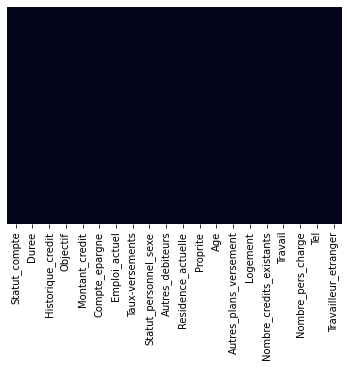

In [ ]:
sns.heatmap(data.isnull(), yticklabels=False, cbar=False)

In [ ]:
data.isnull().sum()

Statut_compte               0
Duree                       0
Historique_credit           0
Objectif                    0
Montant_credit              0
Compte_epargne              0
Emploi_actuel               0
Taux-versements             0
Statut_personnel_sexe       0
Autres_debiteurs            0
Residence_actuelle          0
Proprite                    0
Age                         0
Autres_plans_versement      0
Logement                    0
Nombre_credits_existants    0
Travail                     0
Nombre_pers_charge          0
Tel                         0
Travailleur_etranger        0
dtype: int64

Nous constatons que notre dataset ne contient pas de valeurs manquantes

Etudions les informations statisques de nos variables qualitatives et quantitatives:

In [ ]:
data.describe()

,Duree,Montant_credit,Taux-versements,Residence_actuelle,Age,Nombre_credits_existants,Nombre_pers_charge
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000


In [ ]:
data.describe(include=['O'])

,Statut_compte,Historique_credit,Objectif,Compte_epargne,Emploi_actuel,Statut_personnel_sexe,Autres_debiteurs,Proprite,Autres_plans_versement,Logement,Travail,Tel,Travailleur_etranger
count,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000
unique,4,5,10,5,5,4,3,4,3,3,4,2,2
top,A14,A32,A43,A61,A73,A93,A101,A123,A143,A152,A173,A191,A201
freq,394,530,280,603,339,548,907,332,814,713,630,596,963


Nous allons maintenant étudier la distribution de nos données:  
Nous représenterons les variables quantitatives par un graphique à bar.  
Quant aux données qualitatives, nous les représenterons par un histogramme.


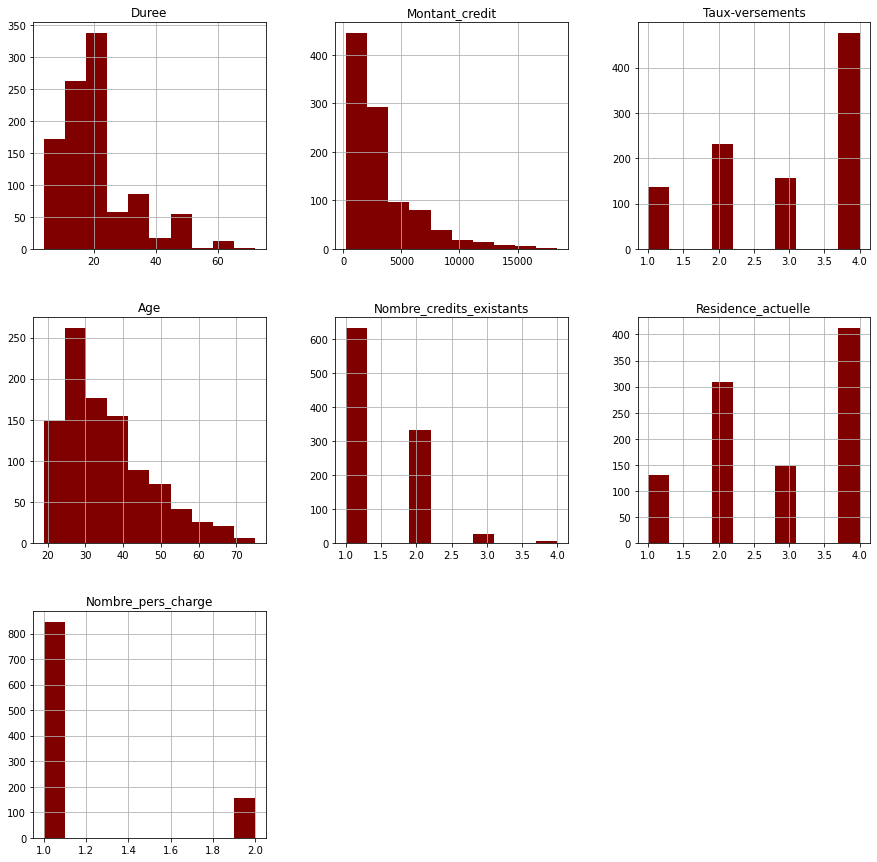

In [ ]:
subset_quant= data[data_quant]
ax = subset_quant.hist(layout=(3,3), figsize=(15, 15), color="maroon")
plt.show()


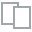
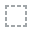
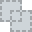
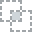
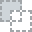
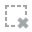
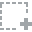
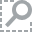
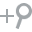
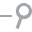
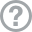
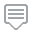
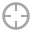
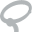
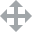
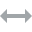
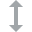
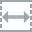
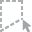
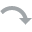
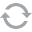
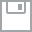
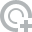
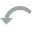
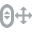
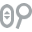
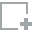
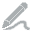
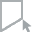
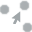
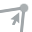
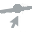

In [ ]:
subset_qual = data[data_qual]

plot(subset_qual)

Etudions maintenant la correlation entre nos variables

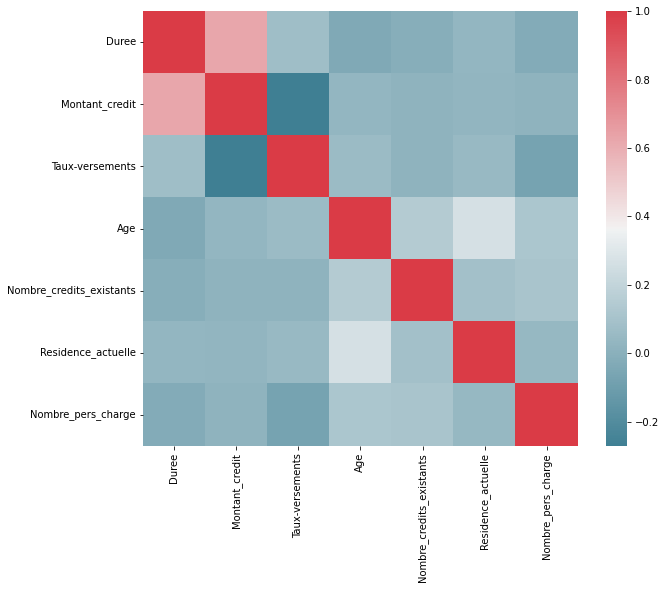

In [ ]:
f, ax = plt.subplots(figsize=(10, 8))
corr = subset_quant.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

On va également afficher la matrice  variance-covariance des données continues, cette analyse nous sera utile plus tard.   

In [ ]:
cov_matrix = subset_quant.cov()
cov_matrix

,Duree,Montant_credit,Taux-versements,Age,Nombre_credits_existants,Residence_actuelle,Nombre_pers_charge
Duree,145.415006,2.127375e+04,1.008389,-4.956995,-0.078600,0.453418,-0.104069
Montant_credit,21273.749776,7.967843e+06,-856.770805,1050.522655,33.906901,90.120110,17.520531
Taux-versements,1.008389,-8.567708e+02,1.251523,0.741483,0.014003,0.060876,-0.028844
Age,-4.956995,1.050523e+03,0.741483,129.401285,0.980759,3.344975,0.486857
Nombre_credits_existants,-0.078600,3.390690e+01,0.014003,0.980759,0.333685,0.057142,0.022938
Residence_actuelle,0.453418,9.012011e+01,0.060876,3.344975,0.057142,1.218193,0.017042
Nombre_pers_charge,-0.104069,1.752053e+01,-0.028844,0.486857,0.022938,0.017042,0.131106


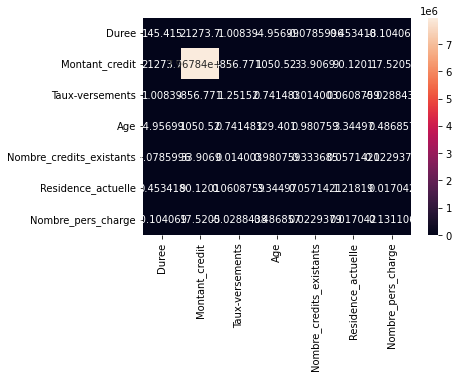

In [ ]:
sns.heatmap(cov_matrix, annot=True, fmt='g')
plt.show()

## II. Preprocesssing

### **Standarisation des données quantitatives**

In [ ]:
np_standarized= MinMaxScaler().fit_transform(subset_quant)
data_standarized = pd.DataFrame(np_standarized, columns=data_quant)

### **Normalisation des donnée quantitatives**

In [ ]:
np_normalized= MinMaxScaler().fit_transform(subset_quant)
data_normalized = pd.DataFrame(np_normalized, columns=data_quant)

### **Recodage des données qualitatives**

In [ ]:
data_dummies = pd.get_dummies(subset_qual)

### **Sampling Strategy**

#### **Standarization**

In [ ]:
df=pd.concat([data_standarized, data_dummies, pd.DataFrame(y.to_numpy(), columns=['class']).replace(2, 0) ], axis=1)
X= df.drop('class', axis=1)
y = df['class']

#1er échantillonnage
X_train_old,X_test_old,y_train_old,y_test_old = train_test_split(X,y,test_size = 0.3,random_state = 42)

#2nd échantillonnage
X_train_bis, X_test_bis, y_train_bis, y_test_bis = train_test_split(X_train_old, y_train_old, test_size = 0.2, random_state = 42)



##### a. Over-sampling strategy

In [ ]:
sm=SMOTE(sampling_strategy='auto')
X_over_s, y_over_s= sm.fit_resample(X_train_bis, y_train_bis)

print('Before sampling:', dict(Counter(y_train_bis)))
print('After sampling:', dict(Counter(y_over_s)))

Before sampling: {1: 393, 0: 167}
After sampling: {1: 393, 0: 393}


##### b. Under-sampling strategy

In [ ]:
rus = RandomUnderSampler(random_state=42, replacement=True)
X_under_s, y_under_s = rus.fit_resample(X_train_bis, y_train_bis)

print('Before sampling:', dict(Counter(y_train_bis)))
print('After sampling:', dict(Counter(y_under_s)))

Before sampling: {1: 393, 0: 167}
After sampling: {0: 167, 1: 167}


#### **Normalization**

In [ ]:
df=pd.concat([data_normalized, data_dummies, pd.DataFrame(y.to_numpy(), columns=['class']).replace(2, 0) ], axis=1)
X = df.drop('class', axis=1)
y = df['class']

#1er échantillonnage
X_train_old2,X_test_old2,y_train_old2,y_test_old2 = train_test_split(X,y,test_size = 0.3,random_state = 42)

#2nd échantillonnage
X_train_bis, X_test_bis, y_train_bis, y_test_bis = train_test_split(X_train_old, y_train_old, test_size = 0.2, random_state = 42)



##### a. Over-sampling strategy

In [ ]:
sm=SMOTE(sampling_strategy='auto')
X_over_n, y_over_n= sm.fit_resample(X_train_bis, y_train_bis)

print('Before sampling:', dict(Counter(y_train_bis)))
print('After sampling:', dict(Counter(y_over_s)))

Before sampling: {1: 393, 0: 167}
After sampling: {1: 393, 0: 393}


##### b. Under-sampling strategy

In [ ]:
rus = RandomUnderSampler(random_state=42, replacement=True)
X_under_n, y_under_n = rus.fit_resample(X_train_bis, y_train_bis)

print('Before sampling:', dict(Counter(y_train_bis)))
print('After sampling:', dict(Counter(y_under_s)))

Before sampling: {1: 393, 0: 167}
After sampling: {0: 167, 1: 167}


## III. Modelling


### Under-Sampling strategy

#### ***Train Test Strategy***

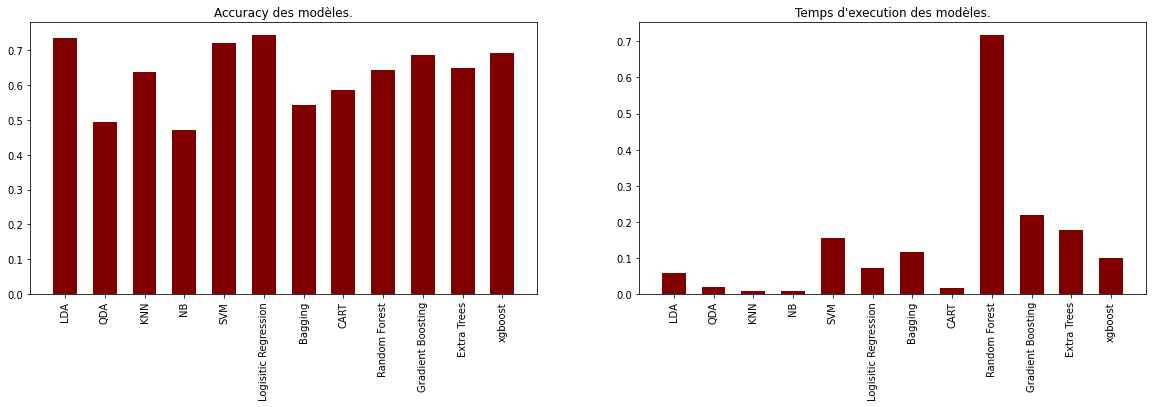

In [ ]:
X_train, X_test, y_train, y_test = X_under_s, X_test_bis, y_under_s,  y_test_bis

result,time=calculate_metrics_train_test_split(classifiers, X_train, X_test, y_train, y_test)
plot_models_results(result, time)

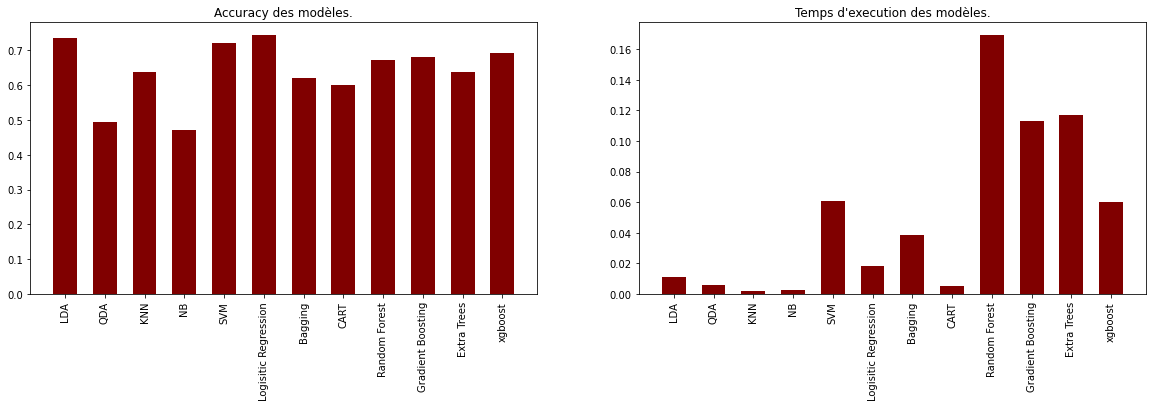

In [ ]:
X_train, X_test, y_train, y_test = X_under_n, X_test_bis, y_under_n,  y_test_bis

result,time=calculate_metrics_train_test_split(classifiers, X_train, X_test, y_train, y_test)
plot_models_results(result, time)

#### ***Cross Validation Strategy***

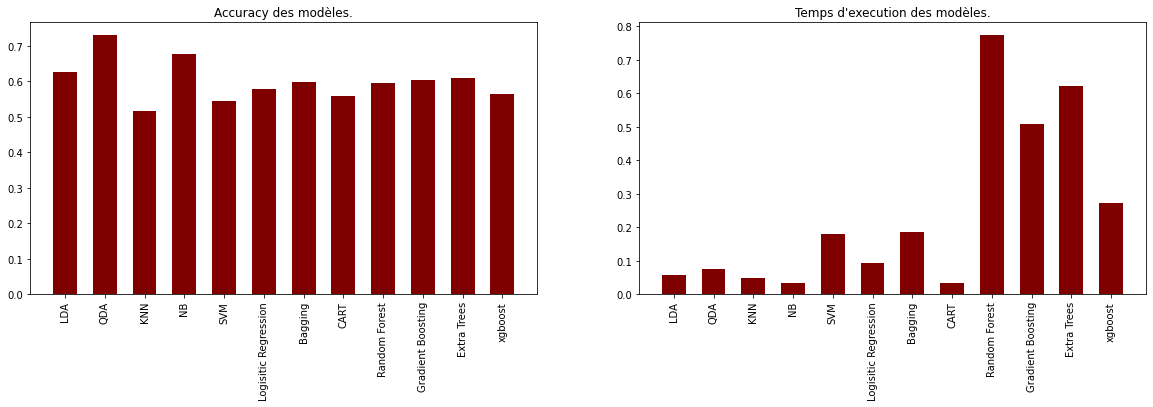

In [ ]:
result,time=calculate_metrics_cross_val(classifiers, X_under_n, y_under_n)
plot_models_results(result, time)

In [ ]:
pd.DataFrame(list(zip(list(classifiers.keys()), result.values(), time.values())),  columns =['Classifieur', 'Accuracy', 'Time'])

,Classifieur,Accuracy,Time
0,LDA,0.625418,0.056333
1,QDA,0.730665,0.075092
2,KNN,0.517775,0.049258
3,NB,0.678109,0.032382
4,SVM,0.544640,0.179119
5,Logisitic Regression,0.577476,0.091479
6,Bagging,0.598417,0.185851
7,CART,0.559837,0.034392
8,Random Forest,0.595613,0.772932
9,Gradient Boosting,0.604659,0.507732


#### **Grid Search on best models**

In [ ]:
best_models = {
    "NB": [GaussianNB(), nb_params],
    "QDA": [QuadraticDiscriminantAnalysis(), qda_params],
    "RandomForest": [RandomForestClassifier(), random_forest_params],
    "GradientBoosting": [GradientBoostingClassifier(), gradient_boosting_params],
    "ExtraTrees":  [ExtraTreesClassifier(), extra_grid_params],
    "xgboost":  [xgb.XGBClassifier(), xgboost_params] }

y1 , l1, conf = grid_search_application(best_models, X_train, y_train, X_test, y_test)

df_y  = pd.DataFrame(y1,columns =['Names', 'param','scoreexec'])
df_y

,Names,param,scoreexec
0,NB,{'var_smoothing': 0.006579332246575682},0.707143
1,QDA,{'reg_param': 0.2},0.707143
2,RandomForest,"{'max_depth': 7, 'max_features': 'auto', 'n_es...",0.714286
3,GradientBoosting,"{'criterion': 'mae', 'learning_rate': 0.2, 'ma...",0.692857
4,ExtraTrees,{'max_features': 50},0.564286
5,xgboost,"{'gamma': 0.5, 'max_depth': 4}",0.650000


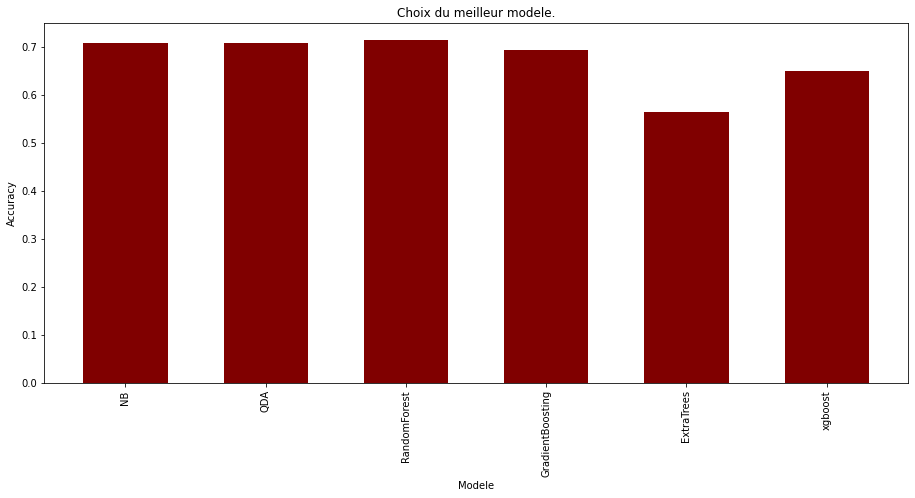

In [ ]:
fig = plt.figure(figsize = (12, 5))
ax = fig.add_axes([0,0,1,1])
ax.bar(df_y['Names'],df_y['scoreexec'], color="maroon", width = 0.6)
plt.xlabel("Modele")
plt.ylabel("Accuracy")
plt.xticks(rotation=90)
plt.title("Choix du meilleur modele.")
plt.show()

#### **Final Model**

In [ ]:
mod, grid = RandomForestClassifier(), random_forest_params
x,y,z,model=best_hyper(mod, grid, X_train, y_train, X_test, y_test)

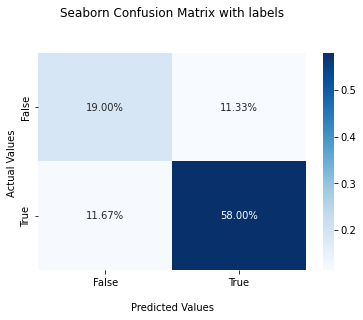

Pour résumé le classifieur a donné les résultats suivant
 
   Accuracy 0.77 
   Precision 0.837 
   F1_score 0.835 
   Recall 0.833 
   NMI 0.164 
   ARI 0.273


In [ ]:
calculate_metrics_to_the_best_models(model, X_test_old, y_test_old)

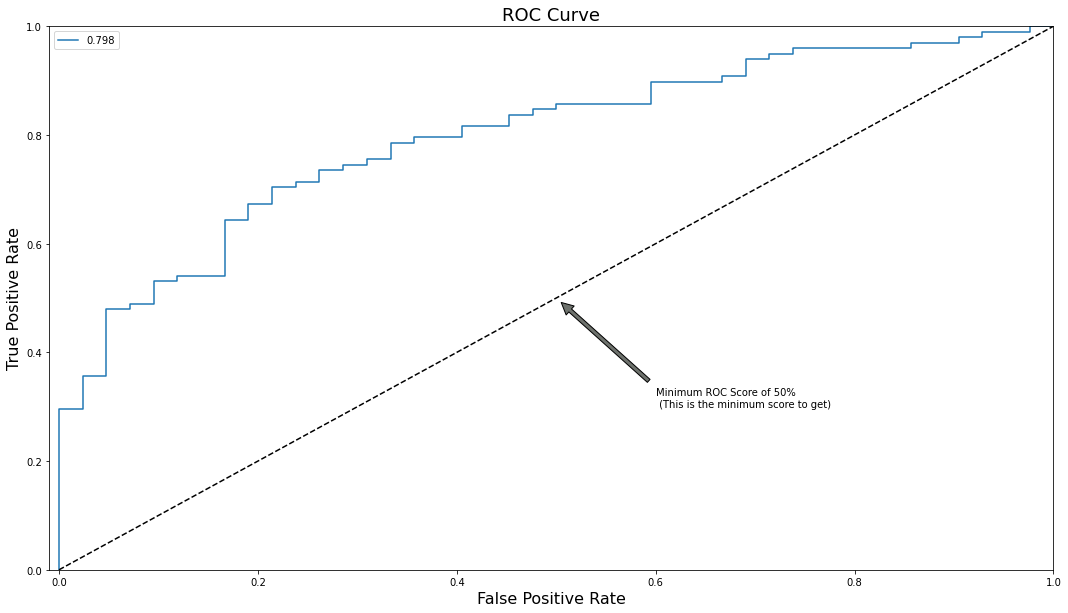

In [ ]:
plot_roc(model, X_test, y_test, X_train, y_train)

### Over-Sampling strategy

#### ***Train Test Strategy***

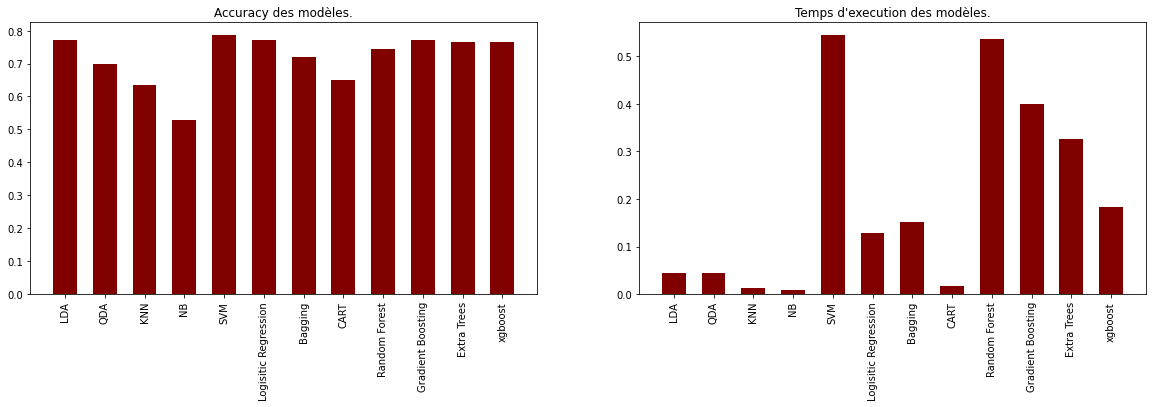

In [ ]:
X_train, X_test, y_train, y_test = X_over_s, X_test_bis, y_over_s,  y_test_bis

result,time=calculate_metrics_train_test_split(classifiers, X_train, X_test, y_train, y_test)
plot_models_results(result, time)

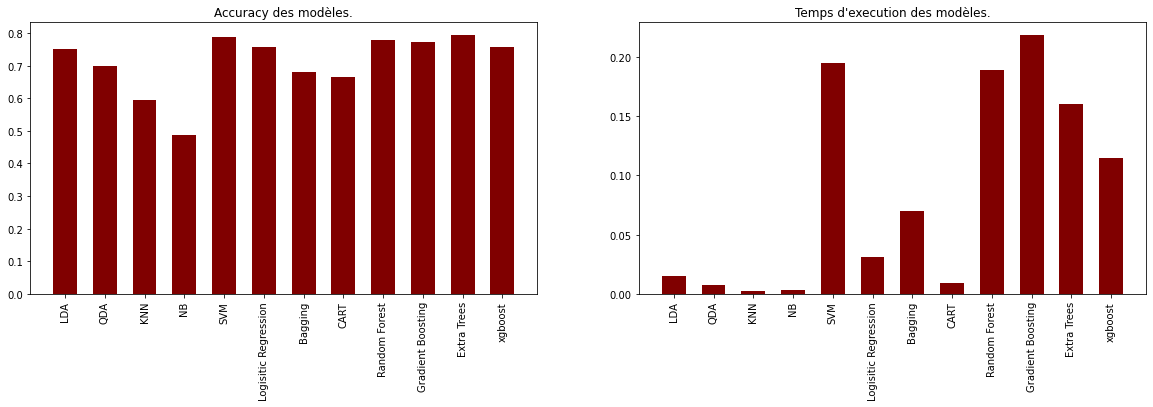

In [ ]:
X_train, X_test, y_train, y_test = X_over_n, X_test_bis, y_over_n,  y_test_bis

result,time=calculate_metrics_train_test_split(classifiers, X_train, X_test, y_train, y_test)
plot_models_results(result, time)

#### ***Cross Validation Strategy***

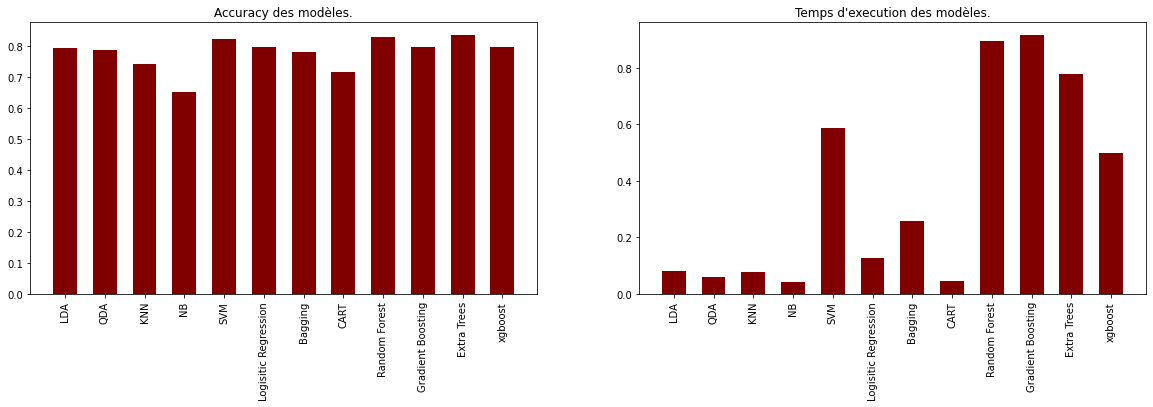

In [ ]:
result,time=calculate_metrics_cross_val(classifiers, X_train, y_train)
plot_models_results(result, time)

In [ ]:
pd.DataFrame(list(zip(list(classifiers.keys()), result.values(), time.values())),  columns =['Classifieur', 'Accuracy', 'Time'])

,Classifieur,Accuracy,Time
0,LDA,0.792760,0.080954
1,QDA,0.786407,0.060307
2,KNN,0.741853,0.077527
3,NB,0.651600,0.043785
4,SVM,0.821930,0.586171
5,Logisitic Regression,0.797839,0.128263
6,Bagging,0.781222,0.259136
7,CART,0.715029,0.046325
8,Random Forest,0.829549,0.893840
9,Gradient Boosting,0.796477,0.915002


#### **Grid Search on best models**

In [ ]:
best_models = {
    "SVM": [SVC(probability=True), svm_params],
    "RandomForest": [RandomForestClassifier(), random_forest_params],
    "GradientBoosting": [GradientBoostingClassifier(), gradient_boosting_params],
    "ExtraTrees":  [ExtraTreesClassifier(), extra_grid_params],
    "xgboost":  [xgb.XGBClassifier(), xgboost_params] }

y1 , l1, conf = grid_search_application(best_models, X_train, y_train, X_test, y_test)

df_y  = pd.DataFrame(y1,columns =['Names', 'param','scoreexec'])
df_y

,Names,param,scoreexec
0,SVM,"{'C': 0.7, 'kernel': 'poly'}",0.785714
1,RandomForest,"{'max_depth': 8, 'max_features': 'log2', 'n_es...",0.771429
2,GradientBoosting,"{'criterion': 'friedman_mse', 'learning_rate':...",0.750000
3,ExtraTrees,{'max_features': 50},0.685714
4,xgboost,"{'gamma': 0.5, 'max_depth': 5}",0.742857


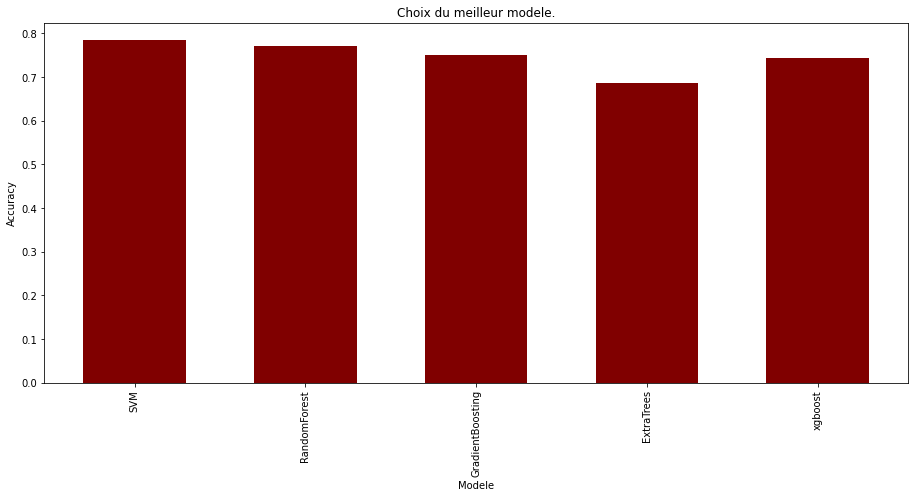

In [ ]:
fig = plt.figure(figsize = (12, 5))
ax = fig.add_axes([0,0,1,1])
ax.bar(df_y['Names'],df_y['scoreexec'], color="maroon", width = 0.6)
plt.xlabel("Modele")
plt.ylabel("Accuracy")
plt.xticks(rotation=90)
plt.title("Choix du meilleur modele.")
plt.show()

#### **Final Model**

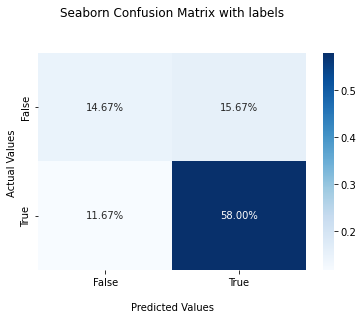

Pour résumé le classifieur a donné les résultats suivant
 
   Accuracy 0.727 
   Precision 0.787 
   F1_score 0.809 
   Recall 0.833 
   NMI 0.087 
   ARI 0.175


In [ ]:
model = ExtraTreesClassifier().fit(X_train, y_train)
calculate_metrics_to_the_best_models(model, X_test_old, y_test_old)

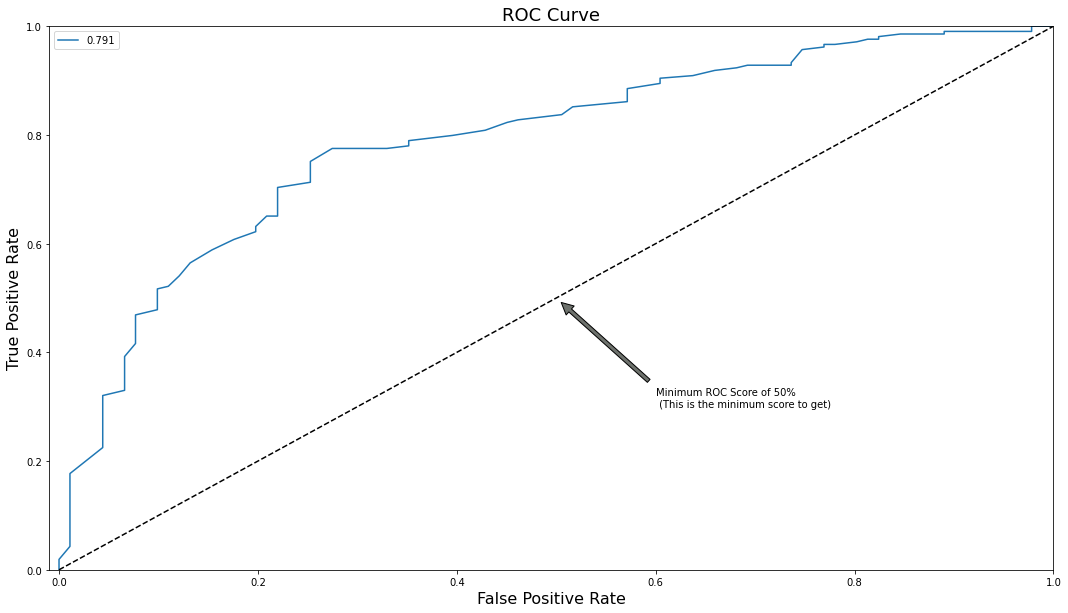

In [ ]:
plot_roc(model, X_test_old, y_test_old, X_train, y_train)

# **Part 2**

## Load dataset

In [ ]:
cora = sio.loadmat('cora.mat')
citeseer = sio.loadmat('citeseer.mat')
pubmed = sio.loadmat('pubmed.mat')

## **Question 1**

### **CORA**

In [ ]:
cora = get_X(cora)

#### I. Analyse Exploratoire des données 

Commençons par analyser la distrubution des classes.

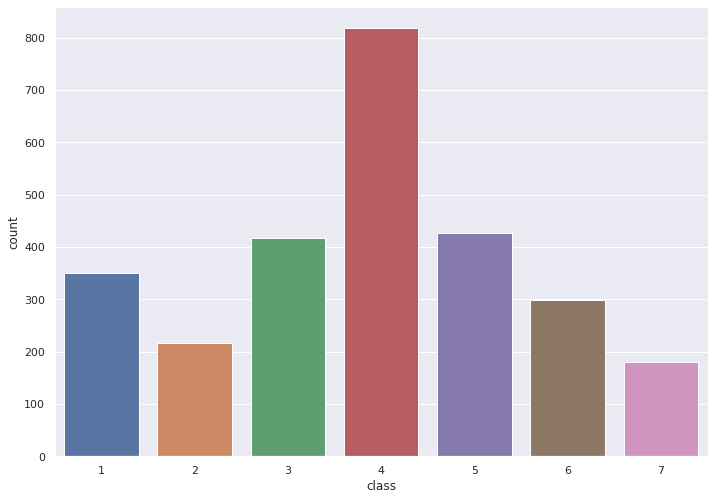

In [ ]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.countplot('class', data=cora)

Il est également important de savoir si notre dataset contient des valeurs manquantes

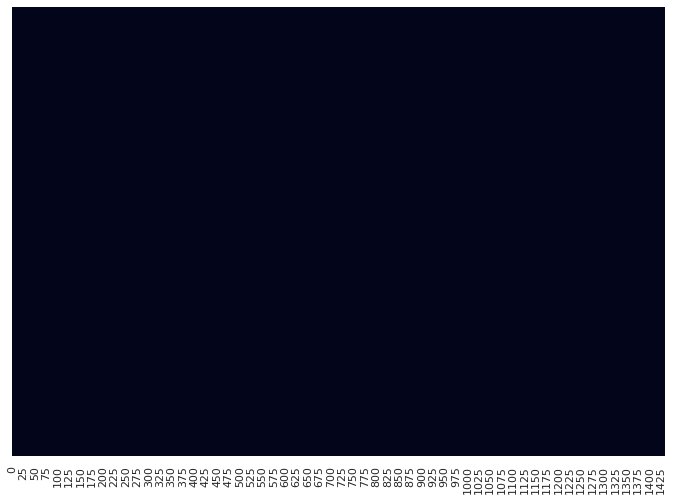

In [ ]:
sns.heatmap(cora.isnull(), yticklabels=False, cbar=False)

In [ ]:
cora.isnull().sum()

0        0
1        0
2        0
3        0
4        0
        ..
1429     0
1430     0
1431     0
1432     0
class    0
Length: 1434, dtype: int64

Nous constatons que notre dataset ne contient pas de valeurs manquantes

#### II. Sampling

In [ ]:
X= cora.drop('class', axis=1)
y = cora['class']

#1er échantillonnage
X_train_old,X_test_old,y_train_old,y_test_old = train_test_split(X,y,test_size = 0.3,random_state = 42)

##### a. Over-sampling strategy

In [ ]:
sm=SMOTE(sampling_strategy='auto')
X_over, y_over= sm.fit_resample(X_train_old, y_train_old)

print('Before sampling:', dict(Counter(y_train_old)))
print('After sampling:', dict(Counter(y_over)))

Before sampling: {6: 218, 3: 297, 4: 543, 5: 303, 7: 132, 1: 250, 2: 152}
After sampling: {6: 543, 3: 543, 4: 543, 5: 543, 7: 543, 1: 543, 2: 543}


##### b. Under-sampling strategy

In [ ]:
rus = RandomUnderSampler(random_state=42, replacement=True)
X_under, y_under = rus.fit_resample(X_train_old, y_train_old)

print('Before sampling:', dict(Counter(y_train_old)))
print('After sampling:', dict(Counter(y_under)))

Before sampling: {6: 218, 3: 297, 4: 543, 5: 303, 7: 132, 1: 250, 2: 152}
After sampling: {1: 132, 2: 132, 3: 132, 4: 132, 5: 132, 6: 132, 7: 132}


#### III. Modelling

##### **Under-Sampling strategy**

###### ***Cross Validation Strategy***

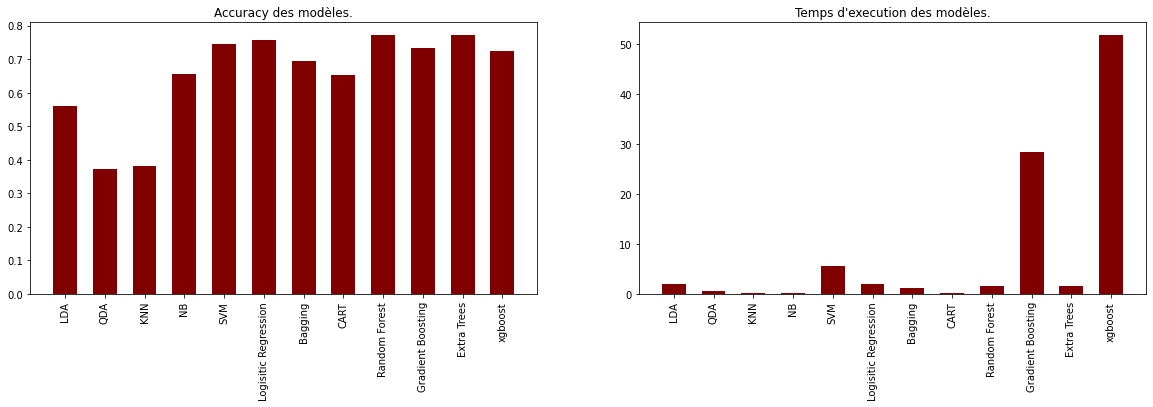

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_under, y_under, test_size = 0.2, random_state = 42)
result,time=calculate_metrics_cross_val(classifiers, X_train, y_train)
plot_models_results(result, time)

In [ ]:
pd.DataFrame(list(zip(list(classifiers.keys()), result.values(), time.values())),  columns =['Classifieur', 'Accuracy', 'Time'])

,Classifieur,Accuracy,Time
0,LDA,0.560222,2.037597
1,QDA,0.372044,0.668112
2,KNN,0.380171,0.281281
3,NB,0.654909,0.215647
4,SVM,0.745495,5.691583
5,Logisitic Regression,0.756306,1.908105
6,Bagging,0.695459,1.248906
7,CART,0.653438,0.289280
8,Random Forest,0.771236,1.556604
9,Gradient Boosting,0.733370,28.292958


###### **Grid Search on best models**

In [ ]:
best_models = {
    "NB": [GaussianNB(), nb_params],
    "SVM":[SVC(random_state=1, max_iter=5000, probability=True),svm_params],
    "RandomForest": [RandomForestClassifier(), random_forest_params],
    "LogisticRegression": [LogisticRegression(),log_reg_params],
    "ExtraTrees":  [ExtraTreesClassifier(), extra_grid_params],
     }

y1 , l1, conf = grid_search_application(best_models, X_train, y_train, X_test, y_test)

df_y  = pd.DataFrame(y1,columns =['Names', 'param','scoreexec'])
df_y

,Names,param,scoreexec
0,NB,{'var_smoothing': 0.0657933224657568},0.708108
1,SVM,"{'C': 1, 'kernel': 'rbf'}",0.751351
2,RandomForest,"{'max_depth': 8, 'max_features': 'auto', 'n_es...",0.675676
3,LogisticRegression,"{'C': 0.1, 'penalty': 'l2', 'solver': 'newton-...",0.762162
4,ExtraTrees,{'max_features': 100},0.767568


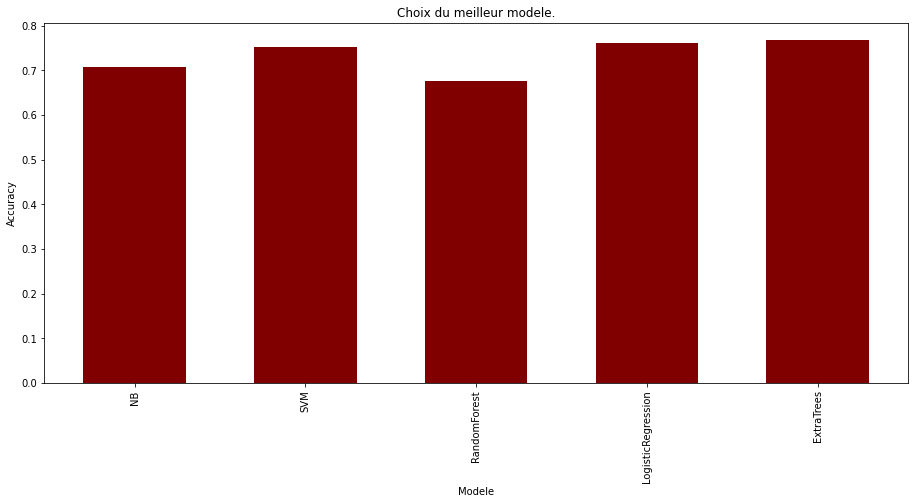

In [ ]:
fig = plt.figure(figsize = (12, 5))
ax = fig.add_axes([0,0,1,1])
ax.bar(df_y['Names'],df_y['scoreexec'], color="maroon", width = 0.6)
plt.xlabel("Modele")
plt.ylabel("Accuracy")
plt.xticks(rotation=90)
plt.title("Choix du meilleur modele.")
plt.show()

######  **Final Model**

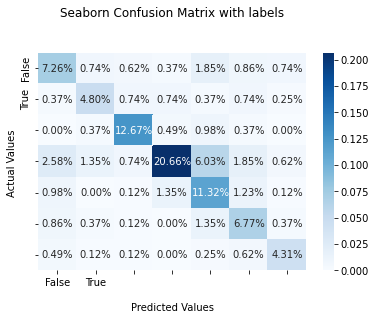

Pour résumé le classifieur a donné les résultats suivant
 
   Accuracy 0.678 
   Precision 0.663 
   F1_score 0.667 
   Recall 0.687 
   NMI 0.421 
   ARI 0.395


In [ ]:
mod, grid = ExtraTreesClassifier(), extra_grid_params
x,y,z,model=best_hyper(mod, grid, X_train, y_train, X_test, y_test)
calculate_metrics_to_the_best_models_multi_class(model, X_test_old, y_test_old)

##### **Over-Sampling strategy**

###### ***Cross Validation Strategy***

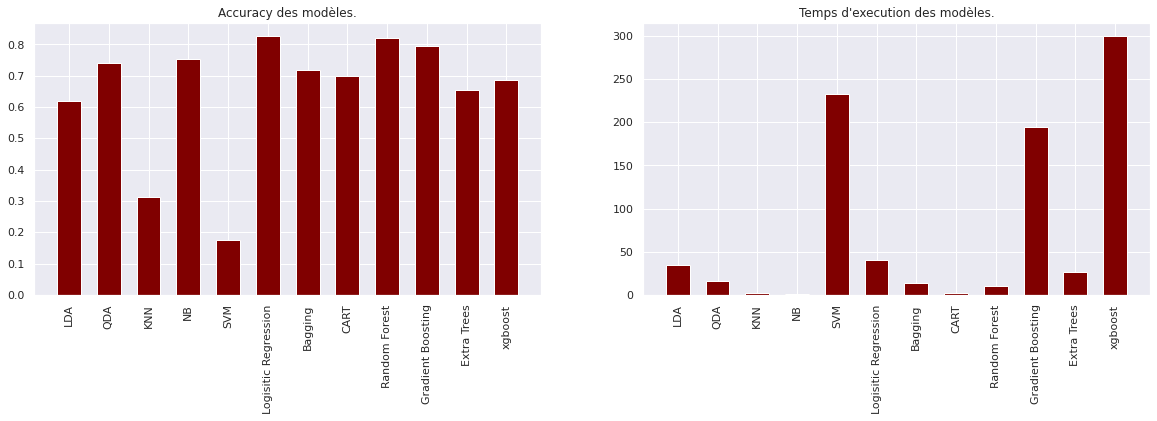

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_over, y_over, test_size = 0.2, random_state = 42)
result,time=calculate_metrics_cross_val(classifiers, X_over, y_over)
plot_models_results(result, time)

In [ ]:
pd.DataFrame(list(zip(list(classifiers.keys()), result.values(), time.values())),  columns =['Classifieur', 'Accuracy', 'Time'])

,Classifieur,Accuracy,Time
0,LDA,0.620968,34.630369
1,QDA,0.739314,15.772404
2,KNN,0.311233,1.997944
3,NB,0.753494,0.836662
4,SVM,0.174394,232.287741
5,Logisitic Regression,0.826887,40.146235
6,Bagging,0.719020,13.544260
7,CART,0.698504,2.292249
8,Random Forest,0.820587,9.774975
9,Gradient Boosting,0.795331,194.419225


###### **Grid Search on best models**

In [ ]:
best_models = {
    "LR": [LogisticRegression(), log_reg_params],
    "RandomForest": [RandomForestClassifier(), random_forest_params]}

y1 , l1, conf = grid_search_application(best_models, X_train, y_train, X_test, y_test)

df_y  = pd.DataFrame(y1,columns =['Names', 'param','scoreexec'])
df_y

,Names,param,scoreexec
0,LR,"{'C': 1, 'penalty': 'l2'}",0.875164
1,RandomForest,"{'max_depth': 8, 'n_estimators': 15}",0.713535


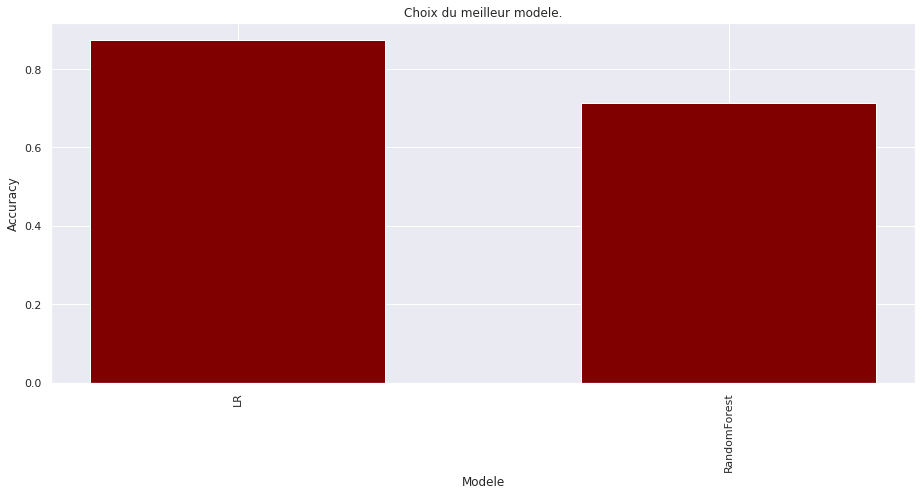

In [ ]:
fig = plt.figure(figsize = (12, 5))
ax = fig.add_axes([0,0,1,1])
ax.bar(df_y['Names'],df_y['scoreexec'], color="maroon", width = 0.6)
plt.xlabel("Modele")
plt.ylabel("Accuracy")
plt.xticks(rotation=90)
plt.title("Choix du meilleur modele.")
plt.show()

###### **Final Model**

In [ ]:
#mod, grid = RandomForestClassifier(), random_forest_params
model=LogisticRegression(C=1, penalty= 'l2').fit(X_train, y_train)

In [ ]:
def calculate_metrics_to_the_best_models(model, X_test, y_test):
    def plot_confusion_matrix(model,y_test, predicted):
      predicted=model.predict(X_test)
      cf_matrix = confusion_matrix(y_test, predicted)
    
      ax = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True,  fmt='.2%', cmap='Blues')
      ax.set_title('Seaborn Confusion Matrix with labels\n\n')
      ax.set_xlabel('\nPredicted Values')
      ax.set_ylabel('Actual Values ')
      ax.xaxis.set_ticklabels(['False','True'])
      ax.yaxis.set_ticklabels(['False','True'])
      plt.show()


    predicted= model.predict(X_test)
    accuracy_= round(accuracy_score(y_test, predicted),3)
    f1_score_= round(f1_score(y_test, predicted, average='macro'),3)
    precision_= round(precision_score(y_test, predicted, average='macro'),3)
    recall_= round(recall_score(y_test, predicted, average='macro'),3)
    nmi = round(normalized_mutual_info_score(y_test, predicted),3)
    ari = round(adjusted_rand_score(y_test, predicted),3)
    plot_confusion_matrix(model,y_test, predicted)
    print("Pour résumé le classifieur a donné les résultats suivant\n", 
          "\n   Accuracy", accuracy_,
          "\n   Precision", precision_,
          "\n   F1_score", f1_score_,
          "\n   Recall", recall_,
          "\n   NMI", nmi,
          "\n   ARI", ari)

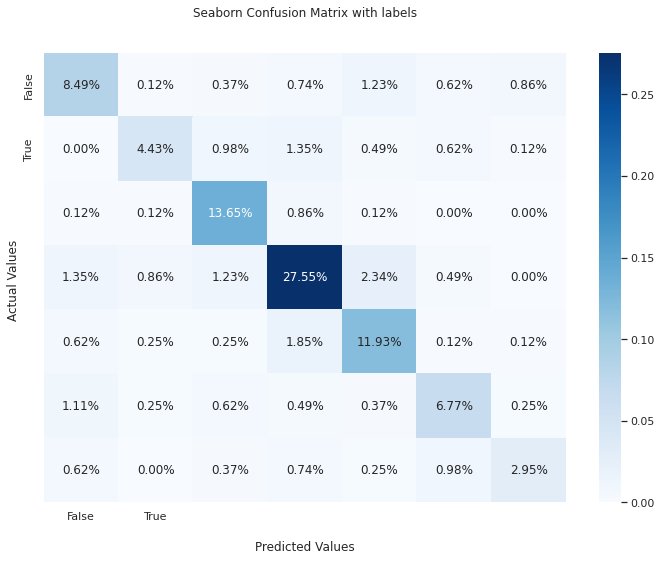

Pour résumé le classifieur a donné les résultats suivant
 
   Accuracy 0.758 
   Precision 0.733 
   F1_score 0.715 
   Recall 0.706 
   NMI 0.499 
   ARI 0.545


In [ ]:
calculate_metrics_to_the_best_models(model, X_test_old, y_test_old)

### **Citeseer**

In [ ]:
cora = get_X(citeseer)

#### I. Analyse Exploratoire des données 

Commençons par analyser la distrubution des classes.

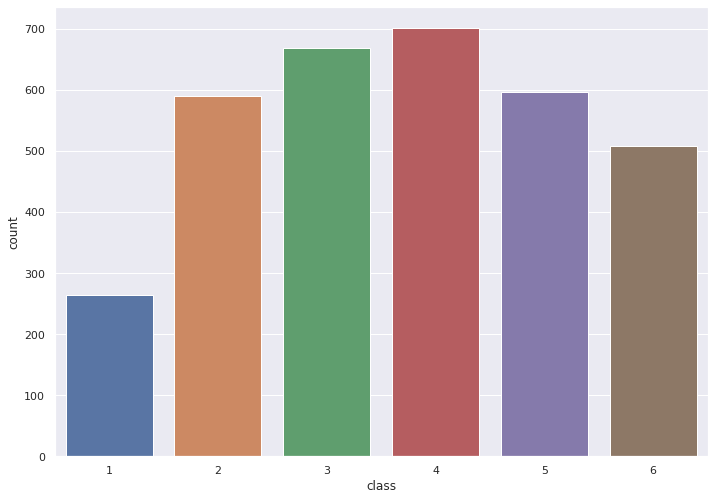

In [ ]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.countplot('class', data=cora)

Il est également important de savoir si notre dataset contient des valeurs manquantes

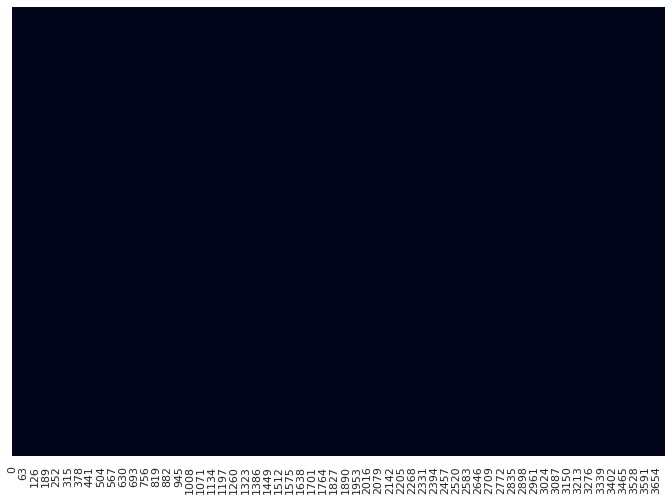

In [ ]:
sns.heatmap(cora.isnull(), yticklabels=False, cbar=False)

In [ ]:
cora.isnull().sum()

0        0
1        0
2        0
3        0
4        0
        ..
3699     0
3700     0
3701     0
3702     0
class    0
Length: 3704, dtype: int64

Nous constatons que notre dataset ne contient pas de valeurs manquantes

#### II. Sampling

In [ ]:
X= cora.drop('class', axis=1)
y = cora['class']

#1er échantillonnage
X_train_old,X_test_old,y_train_old,y_test_old = train_test_split(X,y,test_size = 0.3,random_state = 42)

##### a. Over-sampling strategy

In [ ]:
sm=SMOTE(sampling_strategy='auto')
X_over, y_over= sm.fit_resample(X_train_old, y_train_old)

print('Before sampling:', dict(Counter(y_train_old)))
print('After sampling:', dict(Counter(y_over)))

Before sampling: {6: 353, 4: 487, 5: 425, 3: 447, 1: 195, 2: 421}
After sampling: {6: 487, 4: 487, 5: 487, 3: 487, 1: 487, 2: 487}


##### b. Under-sampling strategy

In [ ]:
rus = RandomUnderSampler(random_state=42, replacement=True)
X_under, y_under = rus.fit_resample(X_train_old, y_train_old)

print('Before sampling:', dict(Counter(y_train_old)))
print('After sampling:', dict(Counter(y_under)))

Before sampling: {6: 353, 4: 487, 5: 425, 3: 447, 1: 195, 2: 421}
After sampling: {1: 195, 2: 195, 3: 195, 4: 195, 5: 195, 6: 195}


#### III. Modelling

##### **Under-Sampling strategy**

###### ***Cross Validation Strategy***

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_under, y_under, test_size = 0.2, random_state = 42)
result,time=calculate_metrics_cross_val(classifiers, X_train, y_train)
plot_models_results(result, time)

In [ ]:
pd.DataFrame(list(zip(list(classifiers.keys()), result.values(), time.values())),  columns =['Classifieur', 'Accuracy', 'Time'])

,Classifieur,Accuracy,Time
0,LDA,0.542701,5.824860
1,QDA,0.395284,2.265016
2,KNN,0.178439,0.716873
3,NB,0.600393,0.557212
4,SVM,0.716862,24.722325
5,Logisitic Regression,0.699767,5.565099
6,Bagging,0.652765,3.541937
7,CART,0.621806,0.818836
8,Random Forest,0.716856,3.339462
9,Gradient Boosting,0.675162,77.719669


###### **Grid Search on best models**

In [ ]:
best_models = {
    "SVM":[SVC(random_state=1, max_iter=5000, probability=True),svm_params],
    "RandomForest": [RandomForestClassifier(), random_forest_params],
    "LogisticRegression": [LogisticRegression(),log_reg_params],
    "ExtraTrees":  [ExtraTreesClassifier(), extra_grid_params],
     }

y1 , l1, conf = grid_search_application(best_models, X_train, y_train, X_test, y_test)

df_y  = pd.DataFrame(y1,columns =['Names', 'param','scoreexec'])
df_y

,Names,param,scoreexec
0,SVM,"{'C': 1, 'kernel': 'rbf'}",0.756410
1,RandomForest,"{'max_depth': 7, 'max_features': 'auto', 'n_es...",0.666667
2,LogisticRegression,"{'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}",0.773504
3,ExtraTrees,{'max_features': 50},0.790598


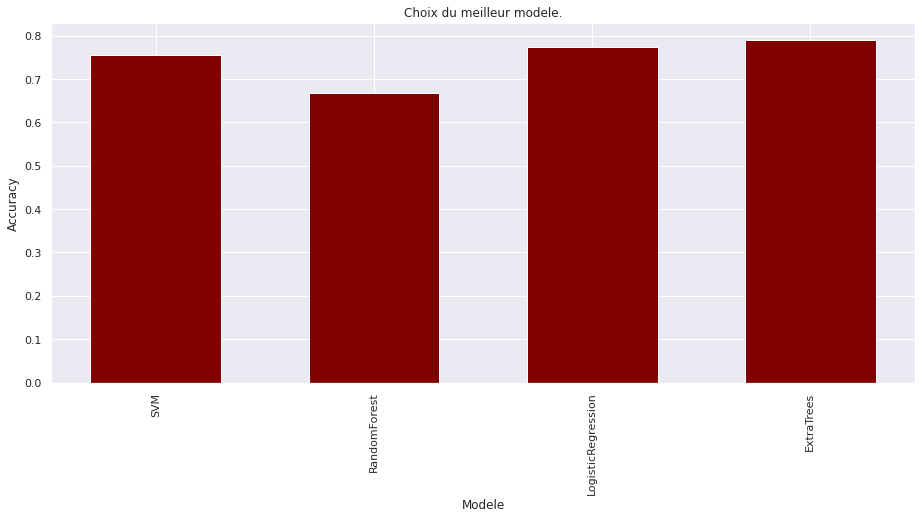

In [ ]:
fig = plt.figure(figsize = (12, 5))
ax = fig.add_axes([0,0,1,1])
ax.bar(df_y['Names'],df_y['scoreexec'], color="maroon", width = 0.6)
plt.xlabel("Modele")
plt.ylabel("Accuracy")
plt.xticks(rotation=90)
plt.title("Choix du meilleur modele.")
plt.show()

######  **Final Model**

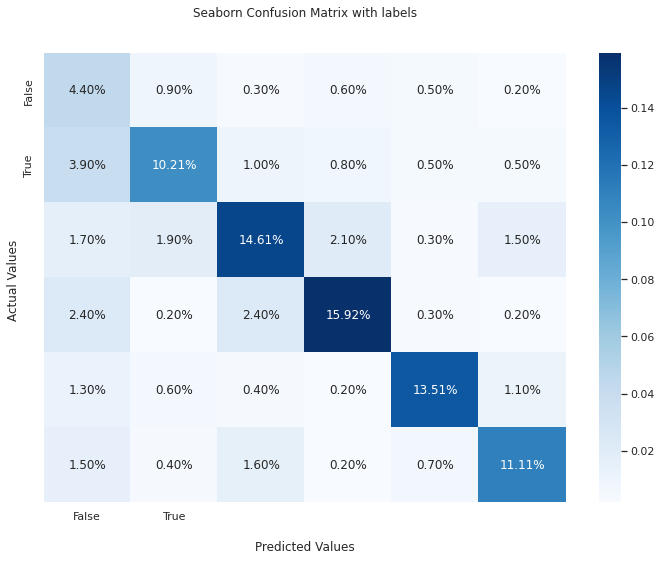

Pour résumé le classifieur a donné les résultats suivant
 
   Accuracy 0.698 
   Precision 0.691 
   F1_score 0.679 
   Recall 0.692 
   NMI 0.438 
   ARI 0.439


In [ ]:
mod, grid = ExtraTreesClassifier(), extra_grid_params
x,y,z,model=best_hyper(mod, grid, X_train, y_train, X_test, y_test)
calculate_metrics_to_the_best_models_multi_class(model, X_test_old, y_test_old)

##### **Over-Sampling strategy**

###### ***Cross Validation Strategy***

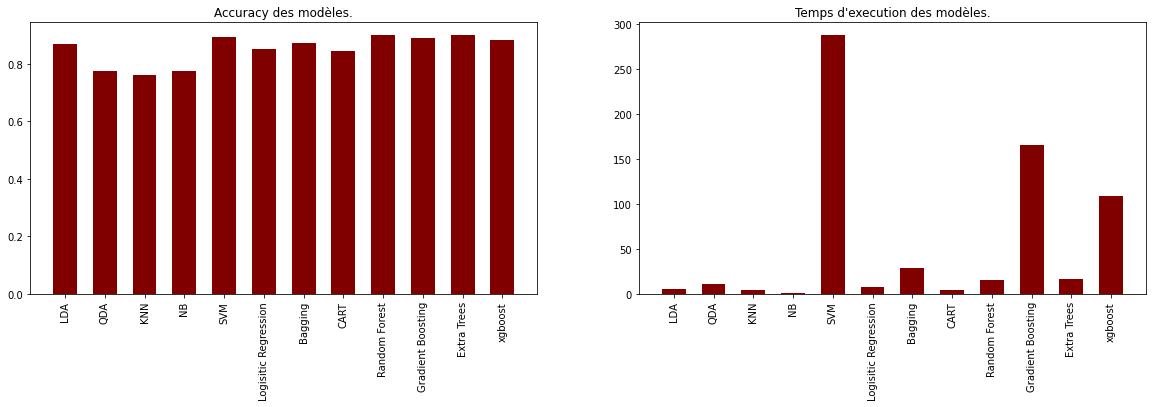

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_over, y_over, test_size = 0.2, random_state = 42)
result,time=calculate_metrics_cross_val(classifiers, X_train, y_train)
plot_models_results(result, time)

In [ ]:
pd.DataFrame(list(zip(list(classifiers.keys()), result.values(), time.values())),  columns =['Classifieur', 'Accuracy', 'Time'])

,Classifieur,Accuracy,Time
0,LDA,0.867077,5.353322
1,QDA,0.774358,10.962829
2,KNN,0.762177,4.555051
3,NB,0.775380,1.046218
4,SVM,0.891725,287.356065
5,Logisitic Regression,0.851232,7.811132
6,Bagging,0.873238,29.465531
7,CART,0.845362,4.289320
8,Random Forest,0.899355,15.507118
9,Gradient Boosting,0.889819,165.450007


###### **Grid Search on best models**

In [ ]:
best_models = {
    "RandomForest": [RandomForestClassifier(), random_forest_params],
    "LogisticRegression": [LogisticRegression(),log_reg_params],
    "ExtraTrees":  [ExtraTreesClassifier(), extra_grid_params],
     }

y1 , l1, conf = grid_search_application(best_models, X_train, y_train, X_test, y_test)

df_y  = pd.DataFrame(y1,columns =['Names', 'param','scoreexec'])
df_y

,Names,param,scoreexec
0,RandomForest,"{'max_depth': 8, 'n_estimators': 15}",0.613675
1,LogisticRegression,"{'C': 0.1, 'penalty': 'l2'}",0.758974
2,ExtraTrees,{'max_features': 350},0.736752


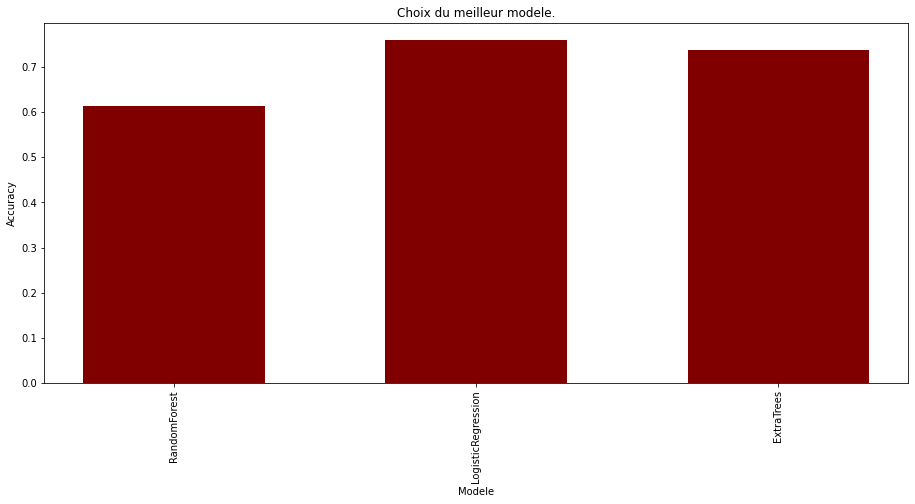

In [ ]:
fig = plt.figure(figsize = (12, 5))
ax = fig.add_axes([0,0,1,1])
ax.bar(df_y['Names'],df_y['scoreexec'], color="maroon", width = 0.6)
plt.xlabel("Modele")
plt.ylabel("Accuracy")
plt.xticks(rotation=90)
plt.title("Choix du meilleur modele.")
plt.show()

###### **Final Model**

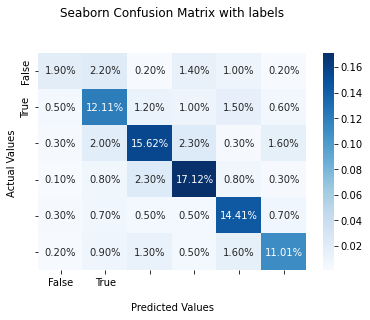

Pour résumé le classifieur a donné les résultats suivant
 
   Accuracy 0.722 
   Precision 0.702 
   F1_score 0.678 
   Recall 0.675 
   NMI 0.439 
   ARI 0.462


In [ ]:
mod, grid = LogisticRegression(), log_reg_params
x,y,z,model=best_hyper(mod, grid, X_train, y_train, X_test, y_test)
calculate_metrics_to_the_best_models_multi_class(model, X_test_old, y_test_old)

### **Pubmed**

In [ ]:
cora = get_X(pubmed)

#### I. Analyse Exploratoire des données 

Commençons par analyser la distrubution des classes.

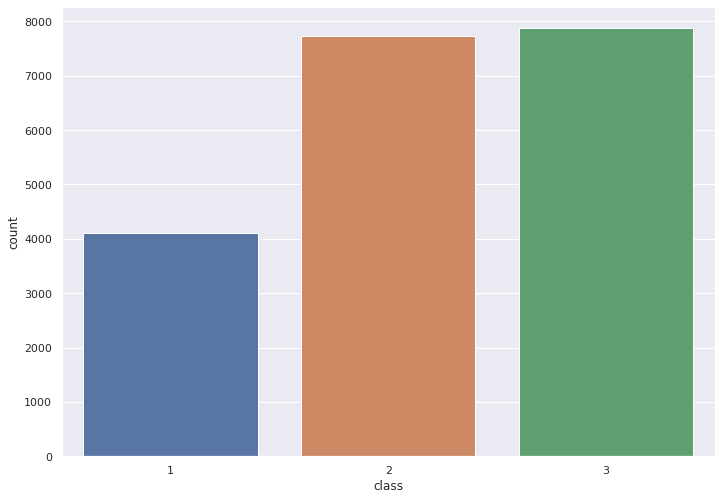

In [ ]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.countplot('class', data=cora)

Il est également important de savoir si notre dataset contient des valeurs manquantes

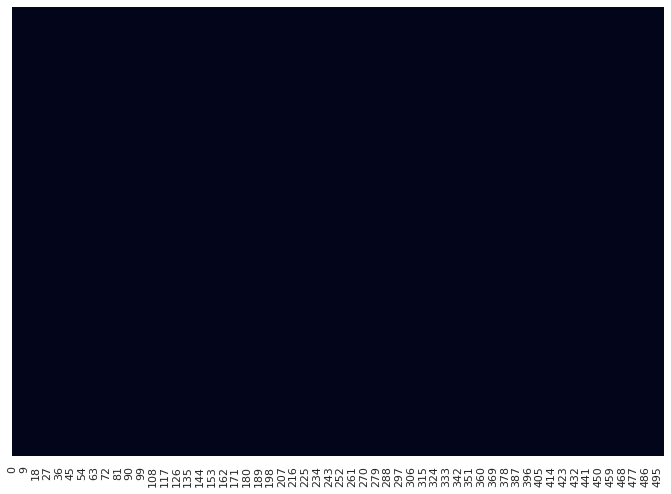

In [ ]:
sns.heatmap(cora.isnull(), yticklabels=False, cbar=False)

In [ ]:
cora.isnull().sum()

0        0
1        0
2        0
3        0
4        0
        ..
496      0
497      0
498      0
499      0
class    0
Length: 501, dtype: int64

Nous constatons que notre dataset ne contient pas de valeurs manquantes

#### II. Sampling

In [ ]:
X= cora.drop('class', axis=1)
y = cora['class']

#1er échantillonnage
X_train_old,X_test_old,y_train_old,y_test_old = train_test_split(X,y,test_size = 0.3,random_state = 42)

##### a. Over-sampling strategy

In [ ]:
sm=SMOTE(sampling_strategy='auto')
X_over, y_over= sm.fit_resample(X_train_old, y_train_old)

print('Before sampling:', dict(Counter(y_train_old)))
print('After sampling:', dict(Counter(y_over)))

Before sampling: {1: 2840, 2: 5443, 3: 5518}
After sampling: {1: 5518, 2: 5518, 3: 5518}


##### b. Under-sampling strategy

In [ ]:
rus = RandomUnderSampler(random_state=42, replacement=True)
X_under, y_under = rus.fit_resample(X_train_old, y_train_old)

print('Before sampling:', dict(Counter(y_train_old)))
print('After sampling:', dict(Counter(y_under)))

Before sampling: {1: 2840, 2: 5443, 3: 5518}
After sampling: {1: 2840, 2: 2840, 3: 2840}


#### III. Modelling

##### **Under-Sampling strategy**

###### ***Cross Validation Strategy***

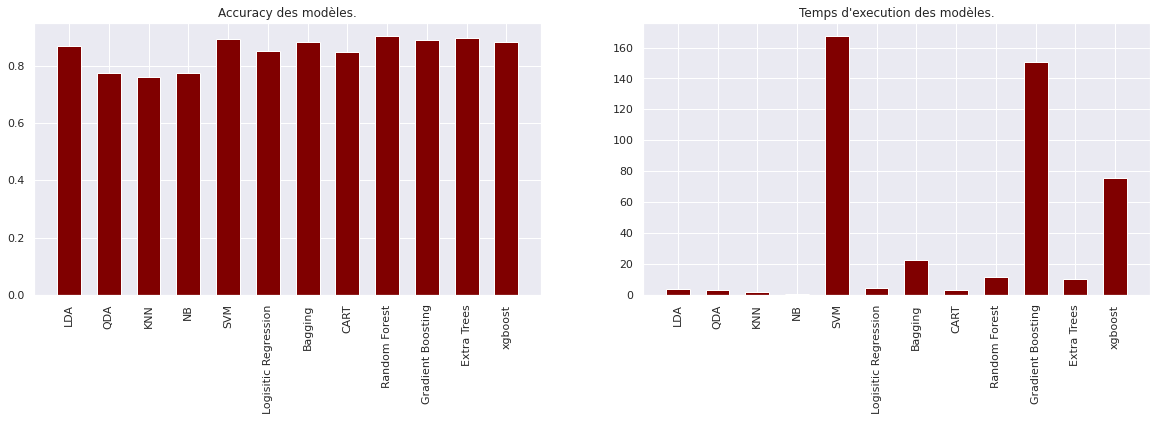

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_under, y_under, test_size = 0.2, random_state = 42)
result,time=calculate_metrics_cross_val(classifiers, X_train, y_train)
plot_models_results(result, time)

In [ ]:
pd.DataFrame(list(zip(list(classifiers.keys()), result.values(), time.values())),  columns =['Classifieur', 'Accuracy', 'Time'])

,Classifieur,Accuracy,Time
0,LDA,0.867077,3.529851
1,QDA,0.774505,3.269266
2,KNN,0.762177,1.814936
3,NB,0.775380,0.314938
4,SVM,0.891725,167.408488
5,Logisitic Regression,0.851232,4.180893
6,Bagging,0.883656,22.455570
7,CART,0.846537,3.446686
8,Random Forest,0.903463,11.810163
9,Gradient Boosting,0.889526,150.745330


###### **Grid Search on best models**

In [ ]:
best_models = {
   
    "LogisticRegression": [LogisticRegression(),log_reg_params],
    "ExtraTrees":  [ExtraTreesClassifier(), extra_grid_params],
     }

y1 , l1, conf = grid_search_application(best_models, X_train, y_train, X_test, y_test)

df_y  = pd.DataFrame(y1,columns =['Names', 'param','scoreexec'])
df_y

,Names,param,scoreexec
0,LogisticRegression,"{'C': 100, 'penalty': 'l2'}",0.883803
1,ExtraTrees,{'max_features': 200},0.933099


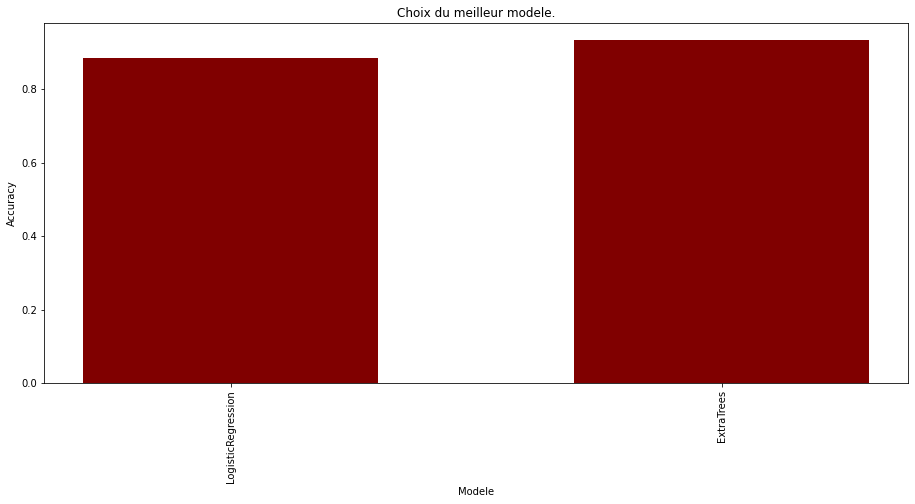

In [ ]:
fig = plt.figure(figsize = (12, 5))
ax = fig.add_axes([0,0,1,1])
ax.bar(df_y['Names'],df_y['scoreexec'], color="maroon", width = 0.6)
plt.xlabel("Modele")
plt.ylabel("Accuracy")
plt.xticks(rotation=90)
plt.title("Choix du meilleur modele.")
plt.show()

######  **Final Model**

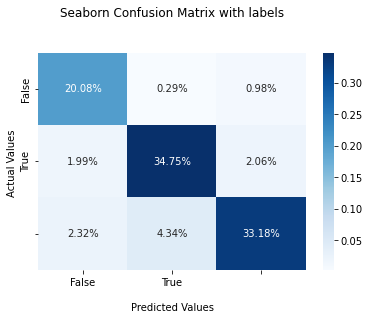

Pour résumé le classifieur a donné les résultats suivant
 
   Accuracy 0.88 
   Precision 0.874 
   F1_score 0.88 
   Recall 0.89 
   NMI 0.6 
   ARI 0.667


In [ ]:
mod, grid = ExtraTreesClassifier(), extra_grid_params
x,y,z,model=best_hyper(mod, grid, X_train, y_train, X_test, y_test)
calculate_metrics_to_the_best_models_multi_class(model, X_test_old, y_test_old)

##### **Over-Sampling strategy**

###### ***Cross Validation Strategy***

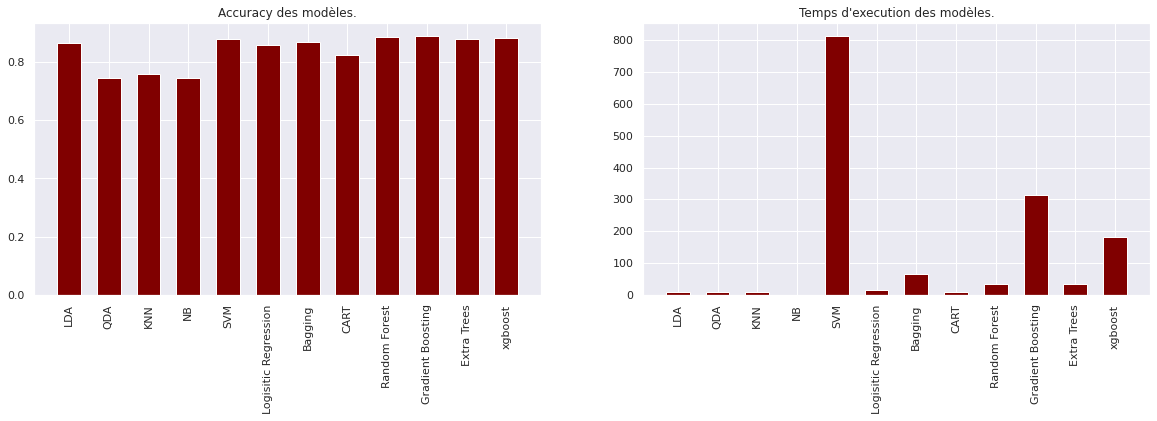

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_over, y_over, test_size = 0.4, random_state = 42)
result,time=calculate_metrics_cross_val(classifiers, X_train, y_train)
plot_models_results(result, time)

In [ ]:
pd.DataFrame(list(zip(list(classifiers.keys()), result.values(), time.values())),  columns =['Classifieur', 'Accuracy', 'Time'])

,Classifieur,Accuracy,Time
0,LDA,0.865735,8.587715
1,QDA,0.744220,7.760318
2,KNN,0.756974,8.345317
3,NB,0.745671,0.747125
4,SVM,0.878198,812.603229
5,Logisitic Regression,0.857692,16.751304
6,Bagging,0.868271,65.840417
7,CART,0.823563,10.227823
8,Random Forest,0.886603,33.156207
9,Gradient Boosting,0.888849,313.888504


###### **Grid Search on best models**

In [ ]:
best_models = {
    "RandomForest": [RandomForestClassifier(), random_forest_params],
    "LogisticRegression": [LogisticRegression(),log_reg_params],
   
     }

y1 , l1, conf = grid_search_application(best_models, X_train, y_train, X_test, y_test)

df_y  = pd.DataFrame(y1,columns =['Names', 'param','scoreexec'])
df_y

,Names,param,scoreexec
0,RandomForest,"{'max_depth': 8, 'n_estimators': 15}",0.842799
1,LogisticRegression,"{'C': 100, 'penalty': 'l2'}",0.877282


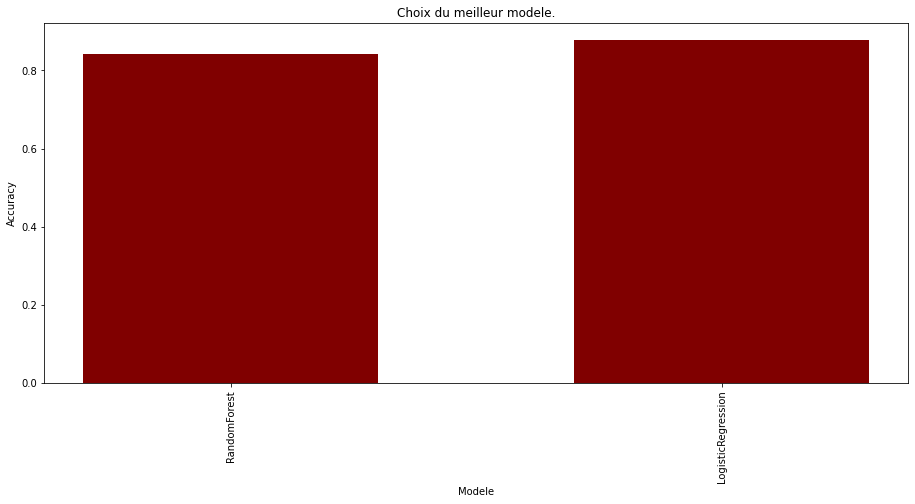

In [ ]:
fig = plt.figure(figsize = (12, 5))
ax = fig.add_axes([0,0,1,1])
ax.bar(df_y['Names'],df_y['scoreexec'], color="maroon", width = 0.6)
plt.xlabel("Modele")
plt.ylabel("Accuracy")
plt.xticks(rotation=90)
plt.title("Choix du meilleur modele.")
plt.show()

###### **Final Model**

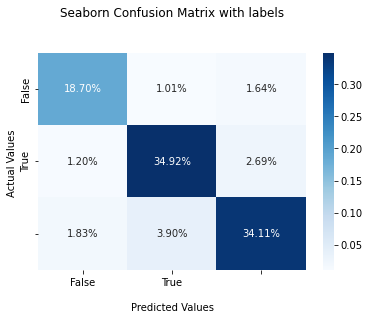

Pour résumé le classifieur a donné les résultats suivant
 
   Accuracy 0.877 
   Precision 0.875 
   F1_score 0.876 
   Recall 0.877 
   NMI 0.58 
   ARI 0.659


In [ ]:
mod, grid = LogisticRegression(),log_reg_params
x,y,z,model=best_hyper(mod, grid, X_train, y_train, X_test, y_test)
calculate_metrics_to_the_best_models(model, X_test_old, y_test_old)

## **Question 2**

### **Cora**

In [ ]:
def create_diag_mat(W):
  sums = []
  for i in range(len(W)):
    sums.append(np.sum(W[i],))
  diag_mat = np.diag(sums)
  return diag_mat

In [ ]:
cora = sio.loadmat('cora.mat')

In [ ]:
W_cora = cora['W']
X_cora = cora['fea']

In [ ]:
D_cora = create_diag_mat(W_cora)
M_cora = inv(D_cora).dot(W_cora).dot(X_cora)

In [ ]:
cora = pd.concat((pd.DataFrame(data=M_cora), pd.DataFrame(columns=["class"],data=cora['gnd'])),axis = 1)

In [ ]:
X = cora.drop('class', axis=1)
y = cora['class']

X_train ,X_test ,y_train ,y_test  = train_test_split(X,y,test_size = 0.3,random_state = 42)

###### ***Cross Validation Strategy***

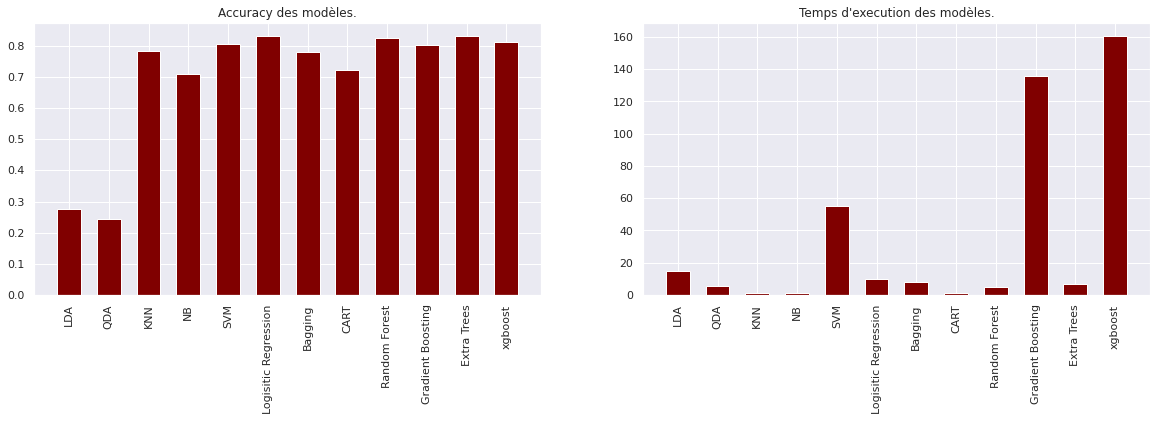

In [ ]:
result,time=calculate_metrics_cross_val(classifiers, X_train, y_train)
plot_models_results(result, time)

In [ ]:
pd.DataFrame(list(zip(list(classifiers.keys()), result.values(), time.values())),  columns =['Classifieur', 'Accuracy', 'Time']).sort_values("Accuracy")

,Classifieur,Accuracy,Time
1,QDA,0.243272,5.742651
0,LDA,0.275462,15.066246
3,NB,0.709235,1.019945
7,CART,0.722427,1.318036
6,Bagging,0.779420,7.718550
2,KNN,0.784697,1.280391
9,Gradient Boosting,0.804222,135.963411
4,SVM,0.806860,55.190067
11,xgboost,0.812665,160.556352
8,Random Forest,0.824274,5.015371


###### **Grid Search on best models**

In [ ]:
best_models = {
    "SVM":[SVC(random_state=1, max_iter=5000, probability=True),svm_params],
    "RandomForest": [RandomForestClassifier(), random_forest_params],
    "LogisticRegression": [LogisticRegression(),log_reg_params],
    "ExtraTrees":  [ExtraTreesClassifier(), extra_grid_params],
     }

y1 , l1, conf = grid_search_application(best_models, X_train, y_train, X_test, y_test)

df_y  = pd.DataFrame(y1,columns =['Names', 'param','scoreexec'])
df_y

,Names,param,scoreexec
0,SVM,"{'C': 0.9, 'kernel': 'sigmoid'}",0.843788
1,RandomForest,"{'max_depth': 8, 'max_features': 'sqrt', 'n_es...",0.691267
2,LogisticRegression,"{'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}",0.845018
3,ExtraTrees,{'max_features': 100},0.820418


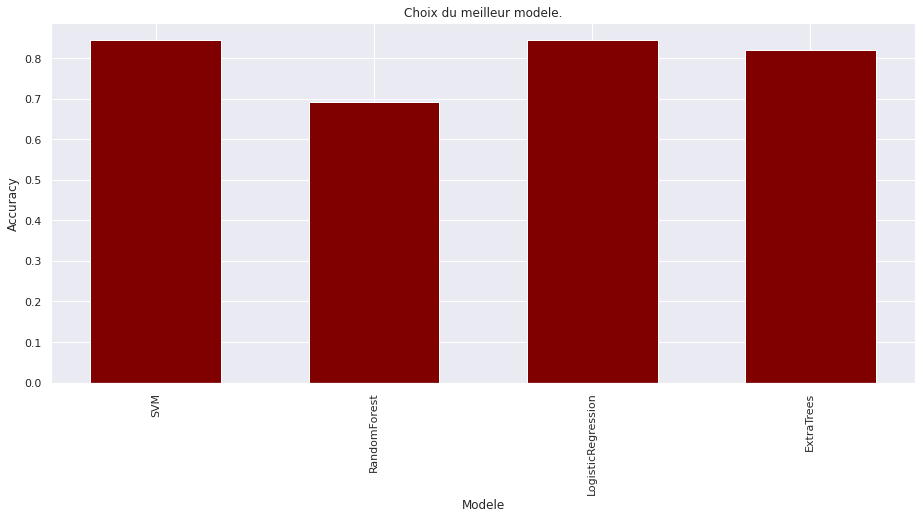

In [ ]:
fig = plt.figure(figsize = (12, 5))
ax = fig.add_axes([0,0,1,1])
ax.bar(df_y['Names'],df_y['scoreexec'], color="maroon", width = 0.6)
plt.xlabel("Modele")
plt.ylabel("Accuracy")
plt.xticks(rotation=90)
plt.title("Choix du meilleur modele.")
plt.show()

######  **Final Model**

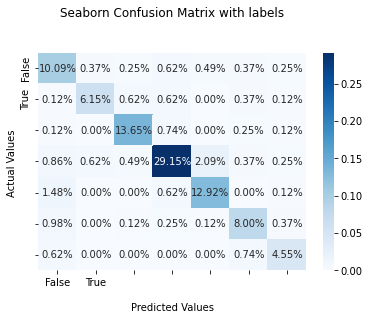

Pour résumé le classifieur a donné les résultats suivant
 
   Accuracy 0.845 
   Precision 0.827 
   F1_score 0.827 
   Recall 0.828 
   NMI 0.655 
   ARI 0.692


In [ ]:
model = LogisticRegression(C= 1, penalty= 'l2', solver= 'liblinear' ).fit(X_train, y_train)
calculate_metrics_to_the_best_models_multi_class(model, X_test, y_test)

### **Citeseer**

In [ ]:
citeseer = sio.loadmat('citeseer.mat')

In [ ]:
W_citeseer = citeseer['W']
X_citeseer = citeseer['fea']

In [ ]:
D_citeseer = create_diag_mat(W_citeseer)
M_citeseer = inv(D_citeseer).dot(W_citeseer).dot(X_citeseer)

In [ ]:
citeseer = pd.concat((pd.DataFrame(data=M_citeseer), pd.DataFrame(columns=["class"],data=citeseer['gnd'])),axis = 1)

In [ ]:
citeseer = citeseer.sample(2500).reset_index().drop("index", axis = 1)

In [ ]:
X = citeseer.drop('class', axis=1)
y = citeseer['class']

X_train ,X_test ,y_train ,y_test  = train_test_split(X,y,test_size = 0.3,random_state = 42)

###### ***Cross Validation Strategy***

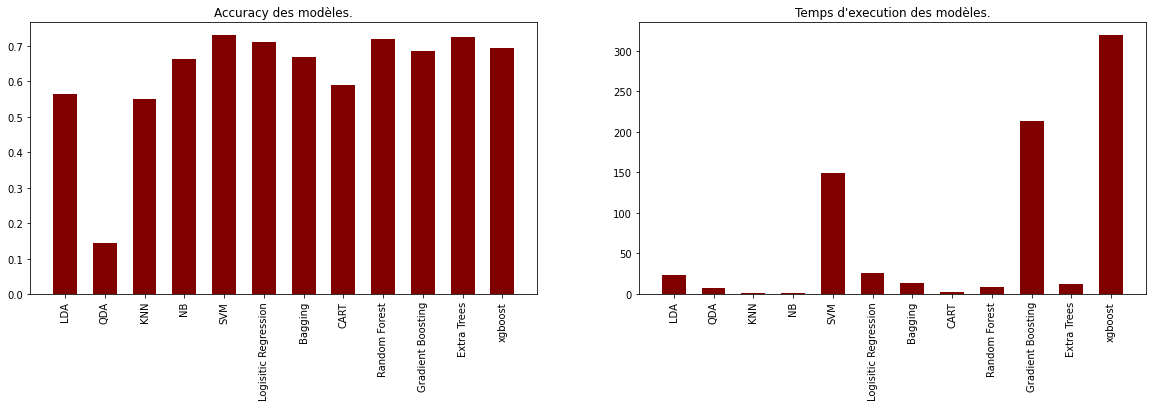

In [ ]:
result,time=calculate_metrics_cross_val(classifiers, X_train, y_train)
plot_models_results(result, time)

In [ ]:
pd.DataFrame(list(zip(list(classifiers.keys()), result.values(), time.values())),  columns =['Classifieur', 'Accuracy', 'Time']).sort_values("Accuracy")

,Classifieur,Accuracy,Time
1,QDA,0.145143,7.371020
2,KNN,0.549714,1.370471
0,LDA,0.564000,23.250769
7,CART,0.589143,2.562896
3,NB,0.664000,1.309535
6,Bagging,0.668000,13.055745
9,Gradient Boosting,0.685714,213.778775
11,xgboost,0.694857,318.983991
5,Logisitic Regression,0.710286,25.554485
8,Random Forest,0.717714,8.369626


###### **Grid Search on best models**

In [ ]:
best_models = {  
    "ExtraTrees":  [ExtraTreesClassifier(), extra_grid_params],
    "SVM":[SVC(random_state=1, max_iter=5000, probability=True),svm_params],
    "RandomForest": [RandomForestClassifier(), random_forest_params]
     }

######  **Final Model**

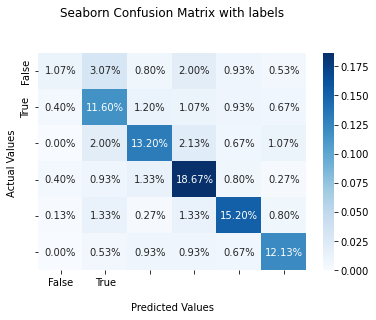

Pour résumé le classifieur a donné les résultats suivant
 
   Accuracy 0.719 
   Precision 0.694 
   F1_score 0.656 
   Recall 0.663 
   NMI 0.439 
   ARI 0.469


In [ ]:
model = ExtraTreesClassifier(max_features = 100).fit(X_train, y_train)
calculate_metrics_to_the_best_models_multi_class(model, X_test, y_test)

### **Pubmed**

In [ ]:
def create_diag_mat(W):
  sums = []
  for i in range(len(W)):
    sums.append(np.sum(W[i],))
  diag_mat = np.diag(sums)
  return diag_mat

In [ ]:
pubmed = sio.loadmat('pubmed.mat')

In [ ]:
W_pubmed = pubmed['W'].toarray()
X_pubmed = pubmed['fea']

In [ ]:
# Pour des contraintes de ressources, on a du éxecuter cette étape dans une machine local ou on dispose de plus de RAM
# on a éxporté le résultat en format csv et on l'a importé ici.
D_pubmed = create_diag_mat(W_pubmed)
M_pubmed = inv(D_pubmed).dot(W_pubmed).dot(X_pubmed)

In [ ]:
M_pubmed = pd.read_csv("pubmed.csv").drop('Unnamed: 0', axis=1)

In [ ]:
X = M_pubmed.drop('class', axis=1)
y = M_pubmed['class']

X_train ,X_test ,y_train ,y_test  = train_test_split(X,y,test_size = 0.3,random_state = 42)

###### ***Cross Validation Strategy***

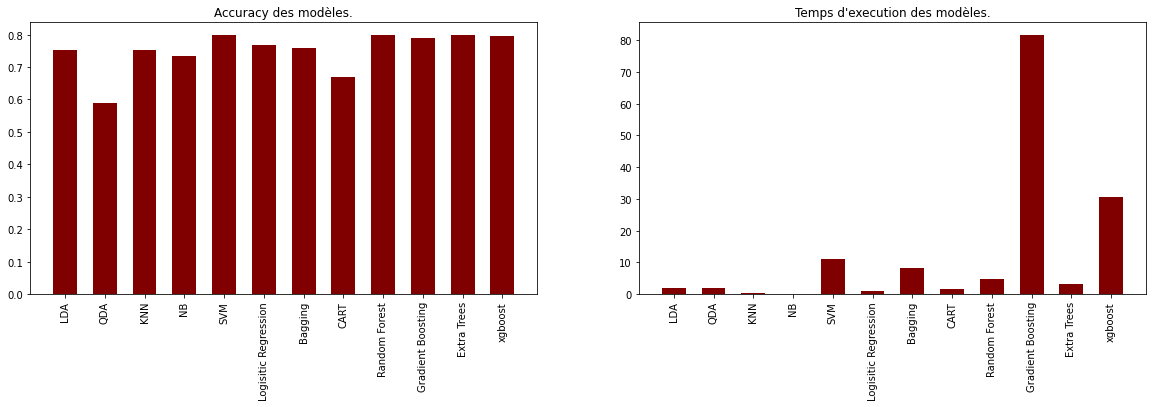

In [ ]:
result,time=calculate_metrics_cross_val(classifiers, X_train, y_train)
plot_models_results(result, time)

In [ ]:
pd.DataFrame(list(zip(list(classifiers.keys()), result.values(), time.values())),  columns =['Classifieur', 'Accuracy', 'Time']).sort_values("Accuracy")

,Classifieur,Accuracy,Time
1,QDA,0.590286,1.761904
7,CART,0.668571,1.459781
3,NB,0.734286,0.159004
2,KNN,0.752000,0.364944
0,LDA,0.753714,1.842697
6,Bagging,0.758286,8.329035
5,Logisitic Regression,0.768000,1.090984
9,Gradient Boosting,0.789143,81.605664
11,xgboost,0.794857,30.518093
4,SVM,0.797714,11.023404


###### **Grid Search on best models**

In [ ]:
best_models = {
    "SVM":[SVC(random_state=1, max_iter=5000, probability=True),svm_params],
    "RandomForest": [RandomForestClassifier(), random_forest_params],
    "LogisticRegression": [LogisticRegression(),log_reg_params],
    "ExtraTrees":  [ExtraTreesClassifier(), extra_grid_params],
     }

y1 , l1, conf = grid_search_application(best_models, X_train, y_train, X_test, y_test)

df_y  = pd.DataFrame(y1,columns =['Names', 'param','scoreexec'])
df_y

,Names,param,scoreexec
0,SVM,"{'C': 1, 'kernel': 'rbf'}",0.784000
1,RandomForest,"{'max_depth': 6, 'n_estimators': 15}",0.753333
2,LogisticRegression,"{'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}",0.789333
3,ExtraTrees,{'max_features': 100},0.800000


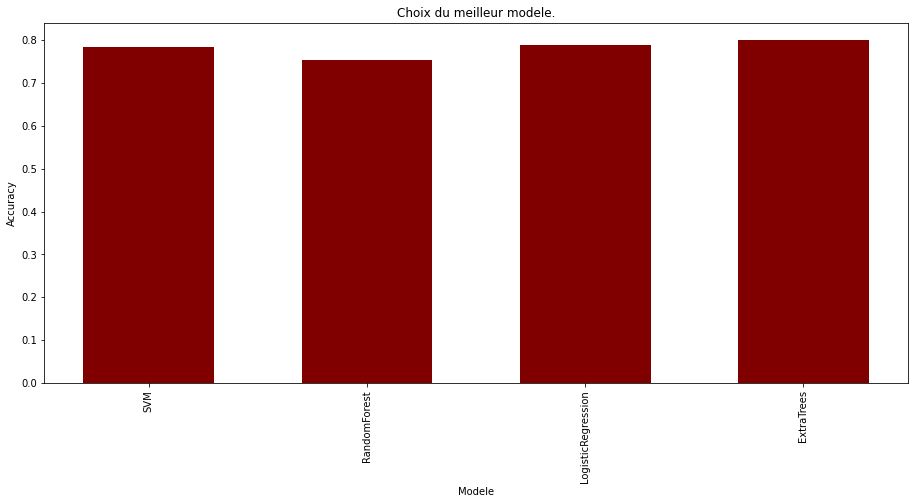

In [ ]:
fig = plt.figure(figsize = (12, 5))
ax = fig.add_axes([0,0,1,1])
ax.bar(df_y['Names'],df_y['scoreexec'], color="maroon", width = 0.6)
plt.xlabel("Modele")
plt.ylabel("Accuracy")
plt.xticks(rotation=90)
plt.title("Choix du meilleur modele.")
plt.show()

######  **Final Model**

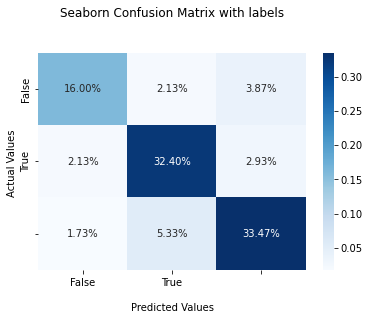

Pour résumé le classifieur a donné les résultats suivant
 
   Accuracy 0.819 
   Precision 0.816 
   F1_score 0.81 
   Recall 0.806 
   NMI 0.449 
   ARI 0.529


In [ ]:
model = ExtraTreesClassifier(max_features = 100).fit(X_train, y_train)
calculate_metrics_to_the_best_models_multi_class(model, X_test, y_test)

## **Question 3**

Afin de combiner et d’aligner les types d’informations contenue dans la matrice W d’adjacence et la matrice X des données. Nous pouvons utiliser les chaines de Merkov, pour rappel le principe de Markov est le suivant: *l'information utile pour la prédiction du futur est entièrement contenue dans l'état présent du processus et n'est pas dépendante des états antérieurs.*     
Ainsi, cette méthode nous permettra de réaliser du
**séquençage**.